In [35]:
import pandas as pd
import numpy as np 
import csv 
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns 

# Loading Cities and their Corresponding Cities

# Loading and concatenating data for each pollutant

In [36]:
df = pd.DataFrame()
cities_to_choose = ['Houston', 'Dallas', 'El Paso', 'Austin', 'San Antonio']

In [37]:
global_variables = ['Date_Local', 'Time_Local', 'City', 'Parameter Name', 'Value', 'Units of Measure', 'Year', 'Month', 'Pollutant',\
                   'Latitude', 'Longitude']

## NO2 Data

In [38]:
no2_df = pd.read_parquet(r"NO2.parquet")
no2_df = no2_df.rename(columns = {'County_Code': 'City', 'Sample_Measurement': 'Value'}) 
no2_df['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
no2_df = no2_df[no2_df.City.isin(cities_to_choose)]
no2_df['Date_Local'] = pd.to_datetime(no2_df['Date_Local'])
no2_df['Year'] = no2_df['Date_Local'].dt.year
no2_df['Month'] = no2_df['Date_Local'].dt.month

In [39]:
no2_df['Pollutant'] = 'NO2'

In [40]:
no2_df['Parameter Name'].unique()

array(['Nitrogen dioxide (NO2)'], dtype=object)

In [41]:
no2_df = no2_df[global_variables]

In [42]:
no2_df.columns

Index(['Date_Local', 'Time_Local', 'City', 'Parameter Name', 'Value',
       'Units of Measure', 'Year', 'Month', 'Pollutant', 'Latitude',
       'Longitude'],
      dtype='object')

In [44]:
df = pd.concat([df, no2_df])
del no2_df

# Ozone Data

In [45]:
%%time

O3_df = pd.read_parquet(r"Ozone.parquet")
O3_df = O3_df.rename(columns = {'County_Code': 'City', 'Sample_Measurement': 'Value'}) 
O3_df['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
O3_df = O3_df[O3_df.City.isin(cities_to_choose)]
O3_df['Date_Local'] = pd.to_datetime(O3_df['Date_Local'])
O3_df['Year'] = O3_df['Date_Local'].dt.year
O3_df['Month'] = O3_df['Date_Local'].dt.month

CPU times: total: 5.03 s
Wall time: 4.03 s


In [46]:
O3_df['Parameter Name'].unique()

array(['Ozone'], dtype=object)

In [47]:
O3_df['Pollutant'] = 'O3'

In [48]:
O3_df = O3_df[global_variables]

In [50]:
df = pd.concat([df, O3_df])
del O3_df

In [51]:
df.columns

Index(['Date_Local', 'Time_Local', 'City', 'Parameter Name', 'Value',
       'Units of Measure', 'Year', 'Month', 'Pollutant', 'Latitude',
       'Longitude'],
      dtype='object')

## CO Data

In [52]:
%%time

CO_df = pd.read_parquet(r'CarbonMonoxide.parquet')
CO_df = CO_df.rename(columns = {'County_Code': 'City', 'Sample_Measurement': 'Value'}) 
CO_df['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
CO_df = CO_df[CO_df.City.isin(cities_to_choose)]
CO_df['Date_Local'] = pd.to_datetime(CO_df['Date_Local'])
CO_df['Year'] = CO_df['Date_Local'].dt.year
CO_df['Month'] = CO_df['Date_Local'].dt.month

CPU times: total: 1.56 s
Wall time: 1.38 s


In [53]:
CO_df['Parameter Name'].unique()

array(['Carbon monoxide'], dtype=object)

In [54]:
CO_df['Units of Measure'].unique()

array(['Parts per million'], dtype=object)

In [55]:
CO_df['Pollutant'] = 'CO'

In [56]:
CO_df = CO_df[global_variables]

In [58]:
df = pd.concat([df, CO_df])
del CO_df

## Lead Data

In [59]:
%%time

lead_df = pd.read_parquet(r"Lead.parquet")
lead_df = lead_df.rename(columns = {'County_Code': 'City', 'Arithmetic Mean': 'Value'})
lead_df['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
lead_df = lead_df[lead_df.City.isin(cities_to_choose)]
lead_df['Date_Local'] = pd.to_datetime(lead_df['Date_Local'])
lead_df['Year'] = lead_df['Date_Local'].dt.year
lead_df['Month'] = lead_df['Date_Local'].dt.month

CPU times: total: 15.6 ms
Wall time: 19.1 ms


In [60]:
lead_df['Parameter Name'].unique()

array(['Lead (TSP) STP', 'Lead (TSP) LC'], dtype=object)

In [62]:
lead_df['Time_Local'] = np.nan

In [63]:
lead_df['Pollutant'] = 'Lead'

In [64]:
lead_df = lead_df[global_variables]

In [66]:
df = pd.concat([df, lead_df])
del lead_df

## PM25 Data

In [67]:
%%time

PM_df = pd.read_parquet(r"PM25.parquet")
PM_df = PM_df.rename(columns = {'County_Code': 'City', 'Sample_Measurement': 'Value'}) 
PM_df['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
PM_df = PM_df[PM_df.City.isin(cities_to_choose)]
PM_df['Date_Local'] = pd.to_datetime(PM_df['Date_Local'])
PM_df['Year'] = PM_df['Date_Local'].dt.year
PM_df['Month'] = PM_df['Date_Local'].dt.month

CPU times: total: 531 ms
Wall time: 464 ms


In [68]:
PM_df['Parameter Name'].unique()

array(['PM2.5 - Local Conditions'], dtype=object)

In [69]:
PM_df['Pollutant'] = 'PM25'

In [70]:
PM_df = PM_df[global_variables]

In [72]:
df = pd.concat([df, PM_df])
del PM_df

## SO2 Data

In [73]:
%%time

SO2_df = pd.read_parquet(r"SO2.parquet")
SO2_df = SO2_df.rename(columns = {'County_Code': 'City', 'Sample_Measurement': 'Value'}) 
SO2_df['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
SO2_df = SO2_df[SO2_df.City.isin(cities_to_choose)]
SO2_df['Date_Local'] = pd.to_datetime(SO2_df['Date_Local'])
SO2_df['Year'] = SO2_df['Date_Local'].dt.year
SO2_df['Month'] = SO2_df['Date_Local'].dt.month

CPU times: total: 1.38 s
Wall time: 1.2 s


In [74]:
SO2_df['Parameter Name'].unique()

array(['Sulfur dioxide'], dtype=object)

In [76]:
SO2_df['Pollutant'] = 'SO2'

In [77]:
SO2_df = SO2_df[global_variables]

In [78]:
df = pd.concat([df, SO2_df])
del SO2_df

In [79]:
df.groupby('Parameter Name')['Pollutant'].unique()

Parameter Name
Carbon monoxide               [CO]
Lead (TSP) LC               [Lead]
Lead (TSP) STP              [Lead]
Nitrogen dioxide (NO2)       [NO2]
Ozone                         [O3]
PM2.5 - Local Conditions    [PM25]
Sulfur dioxide               [SO2]
Name: Pollutant, dtype: object

In [80]:
df.columns

Index(['Date_Local', 'Time_Local', 'City', 'Parameter Name', 'Value',
       'Units of Measure', 'Year', 'Month', 'Pollutant', 'Latitude',
       'Longitude'],
      dtype='object')

In [81]:
df.head(1)

Date_Local Time_Local         City          Parameter Name  Value  \
2676485 2005-01-01      00:00  San Antonio  Nitrogen dioxide (NO2)   14.0   

          Units of Measure  Year  Month Pollutant   Latitude  Longitude  
2676485  Parts per billion  2005      1       NO2  29.426944 -98.486389

## AQI Data

In [85]:
%%time

AQI_df = pd.read_parquet(r"AQI.parquet")
AQI_df = AQI_df.rename(columns = {'County_Code': 'City', 'AQI': 'Value', 'Date': 'Date_Local'}) 
AQI_df['City'].replace(to_replace = ['El_Paso', 'San_Antonio'], value = ['El Paso', 'San Antonio'], inplace = True)
AQI_df = AQI_df[AQI_df.City.isin(cities_to_choose)]
AQI_df['Date_Local'] = pd.to_datetime(AQI_df['Date_Local'])
AQI_df['Year'] = AQI_df['Date_Local'].dt.year
AQI_df['Month'] = AQI_df['Date_Local'].dt.month

CPU times: total: 31.2 ms
Wall time: 59.9 ms


In [86]:
AQI_df['Pollutant'] = 'AQI'

In [88]:
AQI_df['Site_Num'] ='Not Present'
AQI_df['Parameter Code'] = 'Not Present'
AQI_df['Parameter Name'] = 'AQI'
AQI_df['Latitude'] = np.nan
AQI_df['Longitude'] = np.nan
AQI_df['Time_Local'] = np.nan
AQI_df['Units of Measure'] = 'Unitless'
AQI_df['Longitude'] = np.nan
AQI_df['Latitude'] = np.nan

In [89]:
AQI_df = AQI_df[global_variables]

In [91]:
df = pd.concat([df, AQI_df])
del AQI_df

In [92]:
df.groupby('Pollutant')['Parameter Name'].unique()

Pollutant
AQI                               [AQI]
CO                    [Carbon monoxide]
Lead    [Lead (TSP) STP, Lead (TSP) LC]
NO2            [Nitrogen dioxide (NO2)]
O3                              [Ozone]
PM25         [PM2.5 - Local Conditions]
SO2                    [Sulfur dioxide]
Name: Parameter Name, dtype: object

## Plotting the site locations

In [160]:
locations = df[['Pollutant', 'Latitude', 'Longitude']].dropna()

In [161]:
locations = locations.drop_duplicates()
locations = locations.reset_index(drop = True)

In [162]:
import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geopandas import GeoDataFrame
from shapely import wkt

In [163]:
locations['geometry'] = gpd.points_from_xy(x = locations['Longitude'], y = locations['Latitude'])
locations = locations.set_geometry('geometry')

In [167]:
# locations.to_file("EPA_SENSOR_LOCATIONS.shp")

In [165]:
texas = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Texas TROPOMI\Texas shape files\Texas_State_Boundary\State.shp")
# texas_mini = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Texas TROPOMI\Texas shape files\tl_2016_48_cousub\tl_2016_48_cousub.shp")[['NAME', 'NAMELSAD', 'geometry']]

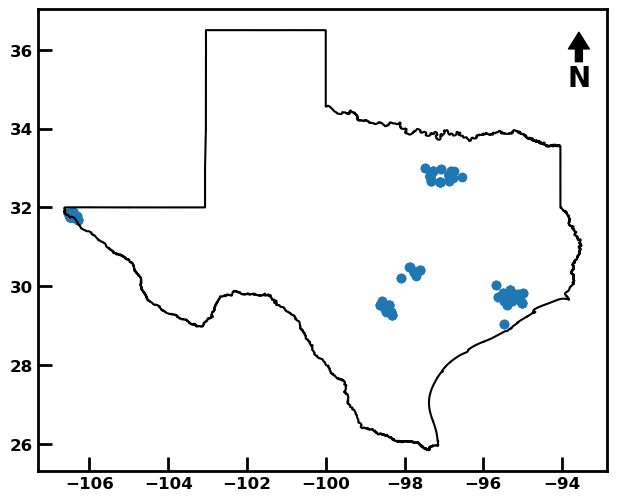

In [166]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
ax = plt.subplot(1, 1, 1)

# ax2 = texas_mini.geometry.boundary.plot(ax = ax, edgecolor = 'black', alpha = 0.2)
ax1 = texas.geometry.boundary.plot(ax = ax, edgecolor = 'black', alpha = 1)


locations.plot(ax = ax, alpha = 0.5, )
# fishnet_x.plot(ax= ax, column = year, cmap = 'jet',linewidth = 0,alpha = 0.5, edgecolor = 'black',legend = False, 
#                missing_kwds = dict(color='grey', label='No Data'),
#                 markersize = 10, vmin =  vmin, vmax = vmax)

ax.tick_params(labelsize=12)
x, y, arrow_length = 0.95, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# plt.text(0.5, 1.1, YEARS[index],
#         horizontalalignment='center',
#         fontsize=70,
#         transform = ax.transAxes)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=10)
ax.tick_params(which = 'both', direction = 'in')

## Plotting Monthly Averages of all cities for ALL POLLUTANTS

In [131]:
from tqdm import tqdm

In [94]:
cols = ['Month', 'mean', 'std', 'count']
month_ranges = range(1, 13)

def add_null_values_to_missing_dates(df_local):
    df_local = df_local.copy()
    months_in_df = df_local.Month.values
    new_data_to_add = []

    for i in month_ranges:
        temp = []
        if i not in months_in_df:
            temp.append(i)
            temp.append(np.nan)
            temp.append(np.nan)
            new_data_to_add.append(temp)

    arr = np.append(df_local.values, new_data_to_add, axis = 0)
    arr = pd.DataFrame(arr, columns = df_local.columns)
    arr = arr.sort_values('Month', ascending = True)
    arr = arr.reset_index(drop = True)
    
    a = arr.dropna().reset_index(drop = True).values
    b = df_local.reset_index(drop = True).values
    print("CASE: ", np.array_equal(a,b))
    return arr   

In [95]:
import copy
from matplotlib import rc, rcParams
rc('font', weight='bold')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
import string
fig_names = string.ascii_lowercase

In [96]:
df.City.unique()

array(['San Antonio', 'Houston', 'Dallas', 'El Paso', 'Austin'],
      dtype=object)

In [97]:
color_and_marker = {
    'San Antonio': ['red', 'v'],
    'Dallas': ['green', '^'],
    'El Paso': ['blue', 'x'],
    'Austin': ['black', 'o'],
    'Houston': ['#07FF19','*'],
}

In [98]:
available_pollutants = df.Pollutant.unique()

In [99]:
available_pollutants

array(['NO2', 'O3', 'CO', 'Lead', 'PM25', 'SO2', 'AQI'], dtype=object)

In [100]:
color_and_marker

{'San Antonio': ['red', 'v'],
 'Dallas': ['green', '^'],
 'El Paso': ['blue', 'x'],
 'Austin': ['black', 'o'],
 'Houston': ['#07FF19', '*']}

In [102]:
df[df.Pollutant == 'CO']

Date_Local Time_Local         City   Parameter Name  Value  \
2850405 2005-01-01      00:00  San Antonio  Carbon monoxide    0.5   
2850406 2005-01-01      01:00  San Antonio  Carbon monoxide    0.4   
2850407 2005-01-01      02:00  San Antonio  Carbon monoxide    0.4   
2850408 2005-01-01      03:00  San Antonio  Carbon monoxide    0.3   
2850409 2005-01-01      04:00  San Antonio  Carbon monoxide    0.2   
...            ...        ...          ...              ...    ...   
210256  2022-01-31      19:00       Austin  Carbon monoxide    0.3   
210257  2022-01-31      20:00       Austin  Carbon monoxide    0.3   
210258  2022-01-31      21:00       Austin  Carbon monoxide    0.3   
210259  2022-01-31      22:00       Austin  Carbon monoxide    0.3   
210260  2022-01-31      23:00       Austin  Carbon monoxide    0.3   

          Units of Measure  Year  Month Pollutant   Latitude  Longitude  
2850405  Parts per million  2005      1        CO  29.426944 -98.486389  
2850406  Parts per million  2005      1        CO  29.426944 -98.486389  
2850407  Parts per million  2005      1        CO  29.426944 -98.486389  
2850408  Parts per million  2005      1        CO  29.426944 -98.486389  
2850409  Parts per million  2005      1        CO  29.426944 -98.486389  
...                    ...   ...    ...       ...        ...        ...  
210256   Parts per million  2022      1        CO  30.353860 -97.691660  
210257   Parts per million  2022      1        CO  30.353860 -97.691660  
210258   Parts per million  2022      1        CO  30.353860 -97.691660  
210259   Parts per million  2022      1        CO  30.353860 -97.691660  
210260   Parts per million  2022      1        CO  30.353860 -97.691660  

[2065397 rows x 11 columns]

In [103]:
# ylabels = ['NO$_2$ (ppb)', 'O$_3$ (ppm)', 'CO (ppb)', 'Lead ($\\mu$g $m^{-3}$)', '$PM_{2.5}$ ($\\mu$g $m^{-3}$)', 'SO$_2$ (ppb)']
ylabels = ['NO$_2$ (ppb)', 'O$_3$ (ppm)', 'CO (ppm)', 'Lead ($\\mu$g $\mathregular{m^{-3}}$)', 'PM$_{2.5}$ ($\\mu$g $\mathregular{m^{-3}}$)', 'SO$_2$ (ppb)', 'AQI']

'($\mathregular{cm^{-2}}$)'

'PM$_{2.5}$ ($\\mu$g $\mathregular{m^{-3}}$)'

In [104]:
import string
fig_names = string.ascii_lowercase

In [105]:
current_pollutant_local = ['NO2', 'O3', 'CO', 'PM25', 'AQI']
ylabels_local = ['NO$_2$ (ppb)',
 'O$_3$ (ppm)',
 'CO (ppm)',
 'PM$_{2.5}$ ($\\mu$g $\\mathregular{m^{-3}}$)',
 'AQI']

In [106]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,0)) 

CURRENT POLLUTANT:  NO2
AVAILABLE POLLUTANTS:  ['Nitrogen dioxide (NO2)']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']
UNIT:  ['Parts per billion']
CITIES IN AGGREGATION FOR POLLUTANT  NO2  are:  ['Austin' 'Dallas' 'El Paso' 'Houston' 'San Antonio']
SELECTED CITY:  Austin
SELECTED CITY:  Dallas
SELECTED CITY:  El Paso
SELECTED CITY:  Houston
SELECTED CITY:  San Antonio


CURRENT POLLUTANT:  O3
AVAILABLE POLLUTANTS:  ['Ozone']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']
UNIT:  ['Parts per million']
CITIES IN AGGREGATION FOR POLLUTANT  O3  are:  ['Austin' 'Dallas' 'El Paso' 'Houston' 'San Antonio']
SELECTED CITY:  Austin
SELECTED CITY:  Dallas
SELECTED CITY:  El Paso
SELECTED CITY:  Houston
SELECTED CITY:  San Antonio


CURRENT POLLUTANT:  CO
AVAILABLE POLLUTANTS:  ['Carbon monoxide']
AVAILABLE CITIES:  ['San Antonio' 'Dallas' 'El Paso' 'Houston' 'Austin']
UNIT:  ['Parts per million']
CITIES IN AGGREGATION FOR POLLUTANT  CO  are:  

Text(0.5, 0.065, 'Month')

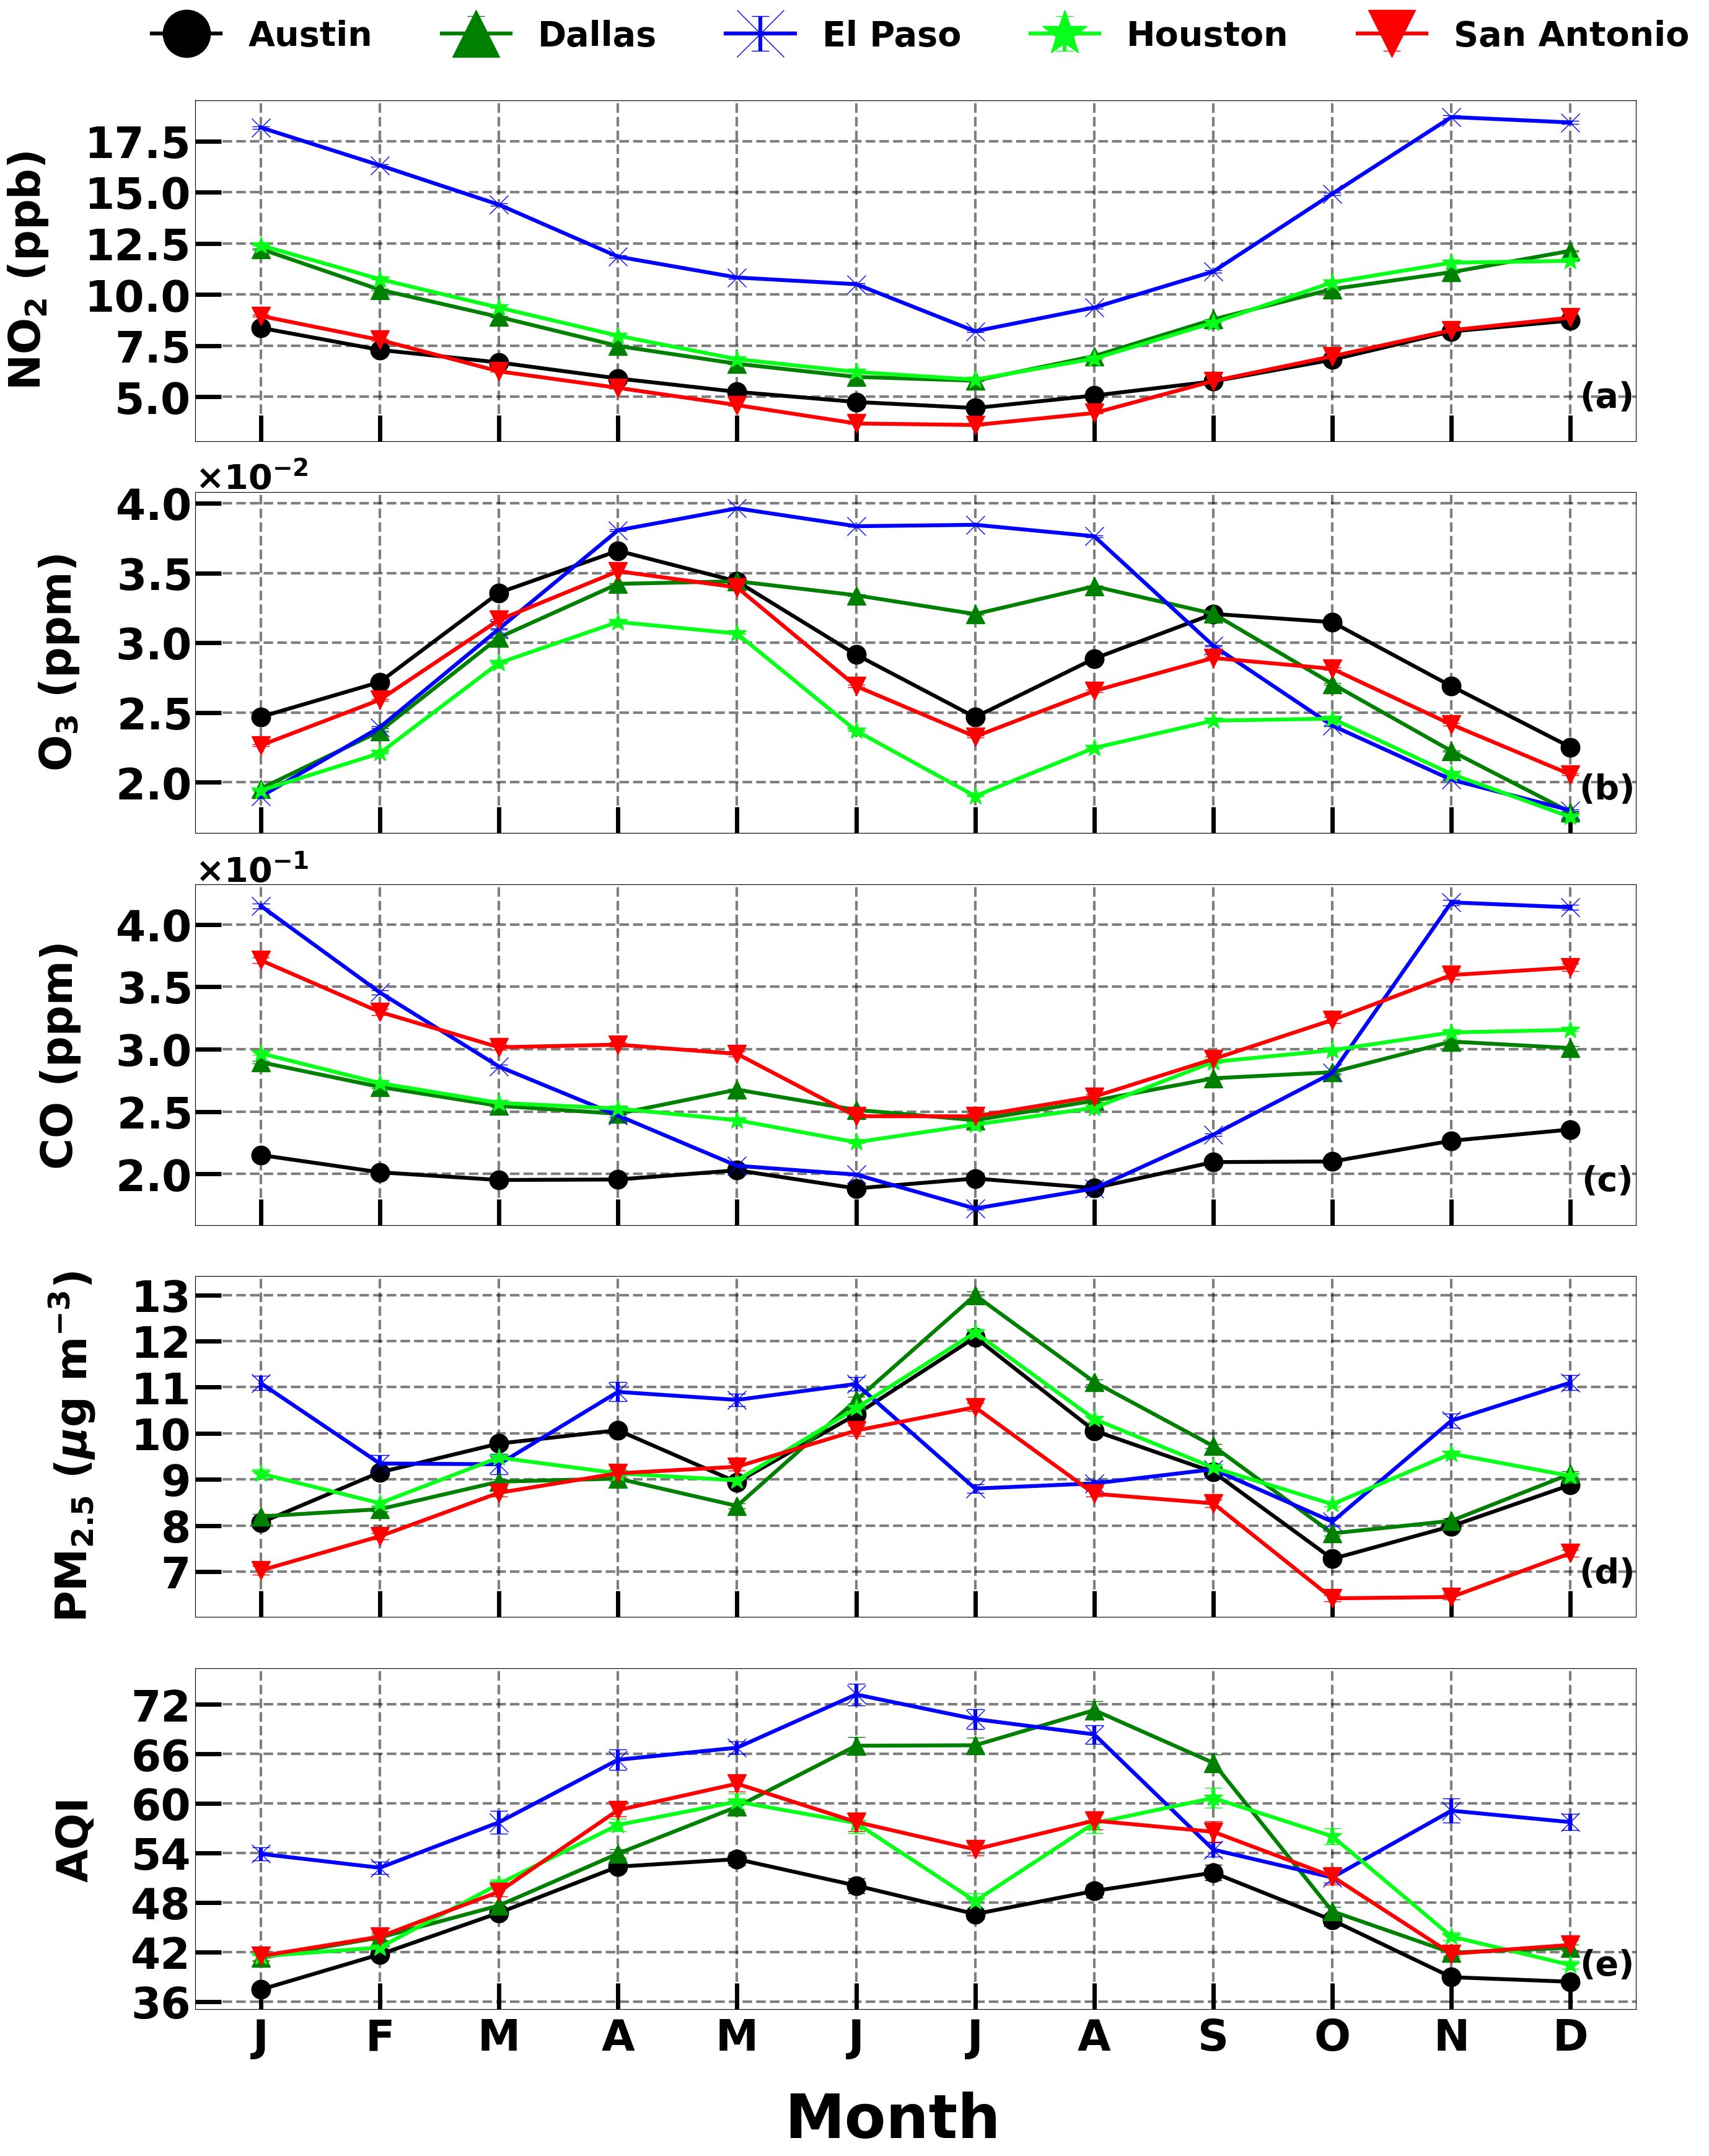

In [109]:
%%time

# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(4, 2)

fig, axes = plt.subplots(5, 1, figsize=(30, 40))
cols = ['City', 'Month', 'mean', 'std', 'count']
image = 1
Months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']


for idx, current_pollutant in enumerate(current_pollutant_local):
    print("CURRENT POLLUTANT: ", current_pollutant)
    ax1 = plt.subplot(5,1,idx+1) 
    pollutant_df = df[df.Pollutant == current_pollutant].copy()
    print("AVAILABLE POLLUTANTS: ", pollutant_df['Parameter Name'].unique())
    print("AVAILABLE CITIES: ", pollutant_df['City'].unique())
    print("UNIT: ", pollutant_df['Units of Measure'].unique())
    aggregate = pollutant_df.groupby(['City', 'Month']).agg({'Value': ['mean', 'std', 'count']}).reset_index()
    aggregate.columns = cols
    print("CITIES IN AGGREGATION FOR POLLUTANT ", current_pollutant, " are: ", aggregate.City.unique())
    
    # Iterating through each city for current pollutant
    for idx1, city in enumerate(aggregate.City.unique()):
        print("SELECTED CITY: ", city)
        aggregate_for_a_city = aggregate[aggregate.City == city].copy()
        aggregate_for_a_city = aggregate_for_a_city.reset_index(drop = True)
        aggregate_for_a_city['Standard_Error'] = aggregate_for_a_city['std'] / np.sqrt(aggregate_for_a_city['count'])
        aggregate_for_a_city = aggregate_for_a_city[['Month', 'mean', 'Standard_Error']]
        
        if aggregate_for_a_city.shape[0] < len(month_ranges):
            print("INPUT SHAPE: ", aggregate_for_a_city.shape)
            aggregate_for_a_city = add_null_values_to_missing_dates(aggregate_for_a_city)
            print("OUTPUT SHAPE: ", aggregate_for_a_city.shape)
        
        plot1 = ax1.errorbar(
          x = aggregate_for_a_city['Month'], 
          y = aggregate_for_a_city['mean'], 
          yerr = aggregate_for_a_city['Standard_Error'],
          capsize = 10,
          fmt = color_and_marker[city][1], 
          color = color_and_marker[city][0], 
          markersize = 22,  
          alpha = 1,
          linewidth = 4.5, 
          linestyle = '-', label = city)
        
    ax1.set_ylabel(ylabels_local[idx], fontsize = 50, labelpad = 40, fontweight = 'bold')
    ax1.tick_params(which='both', width=5)
    ax1.tick_params(which='major', length=30)
    ax1.tick_params(which='minor', length=10)
    ax1.tick_params(which = 'both', direction = 'in')
    ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 3, color = 'black')
    ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
    
    if current_pollutant in ['Lead', "O3", 'CO']:
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
    elif current_pollutant in ['PM25', 'SO2']:
        ax1.yaxis.set_major_locator(plt.MaxNLocator(8))
    else:
         ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
            
    plt.xticks(range(1, 13, 1))
    plt.xticks(ax1.get_xticks(), Months, fontsize =12)
    ax1.tick_params(axis ='y', labelbottom=True, labelsize = 50, pad = 5) 
    ax1.tick_params(axis ='x', labelbottom=True, labelsize = 50, pad = 10) 

    if image == 1:
        lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        leg = fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.085, 0.925), \
                         fontsize = 40, ncol = 5,markerscale=2.5, frameon=False)
    
    
    ax1.text(0.98, 0.1, "("+fig_names[idx]+")", horizontalalignment='center',\
         transform=ax1.transAxes, fontsize = 40, fontweight="bold", rotation = 'horizontal')
    

    if image not in [5]:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
    # if image == 1:
    #     ax1.set_ylim([0, 22])

    if current_pollutant in ["O3", "CO"]:
        from matplotlib import ticker
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_scientific(True) 
        formatter.set_powerlimits((-1,0)) 
        ax1.yaxis.set_major_formatter(formatter)
        ax1.ticklabel_format(style='scientific', axis = 'y') 
        t = ax1.yaxis.get_offset_text()
        t.set_size(40) 
    
    print("\n")
    image += 1
    # break

# fig.delaxes(axes[3][1])

# axes[3, 0].set_position([0.125, 0.1, 0.7, 0.8])

### SUBPLOT SETTINGS -----------------------------
plt.subplots_adjust(wspace=0.2, hspace=0.15)
fig.text(0.5, 0.065, 'Month', ha='center', va='center', fontsize = 70)
# plt.savefig('Monthly_TimeseriesVariation.jpg',  bbox_inches='tight', dpi = 500)

## Testing Monthly

In [297]:
available_pollutants

array(['NO2', 'O3', 'CO', 'Lead', 'PM25', 'SO2', 'AQI'], dtype=object)

In [298]:
a = df[df.Pollutant == 'AQI']

['Nitrogen dioxide (NO2)']
['Parts per billion']
CPU times: total: 1.62 s
Wall time: 1.79 s


''

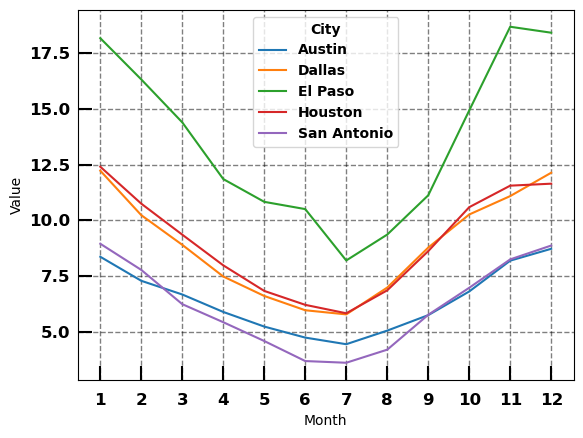

In [318]:
%%time

a = df[df.Pollutant == 'NO2']
print(a['Parameter Name'].unique())
print(a['Units of Measure'].unique())
b = a.groupby(['City', 'Month'])['Value'].mean().reset_index()

ax1 = plt.subplot()
plot1 = sns.lineplot(x = 'Month', y = 'Value', hue = 'City', data = b, ax = ax1)
ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
ax1.tick_params(axis ='y', labelbottom=True, labelsize = 12, pad = 5) 
ax1.tick_params(axis ='x', labelbottom=True, labelsize = 12, pad = 10) 
ax1.tick_params(which='both', width=1.5)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=6)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
plt.xticks(range(1, 13, 1))
# plt.xticks(ax1.get_xticks(), Months, fontsize =12);
;
;

# Yearly Variation

In [110]:
# cols = ['Year', 'mean', 'std', 'count']
year_ranges = range(2005, 2023)

def add_null_values_to_missing_dates(df_local):
    df_local = df_local.copy()
    year_in_df = df_local.Year.values
    new_data_to_add = []

    for i in year_ranges:
        temp = []
        if i not in year_in_df:
            temp.append(i)
            temp.append(np.nan)
            temp.append(np.nan)
            new_data_to_add.append(temp)

    arr = np.append(df_local.values, new_data_to_add, axis = 0)
    arr = pd.DataFrame(arr, columns = df_local.columns)
    arr = arr.sort_values('Year', ascending = True)
    arr = arr.reset_index(drop = True)
    
    a = arr.dropna().reset_index(drop = True).values
    b = df_local.reset_index(drop = True).values
    print("CASE: ", np.array_equal(a,b))
    return arr   

In [111]:
available_pollutants

array(['NO2', 'O3', 'CO', 'Lead', 'PM25', 'SO2', 'AQI'], dtype=object)

In [112]:
current_pollutant_local = ['NO2', 'O3', 'CO', 'AQI']
ylabels_local = ['NO$_2$ (ppb)',
 'O$_3$ (ppm)',
 'CO (ppm)',
 'AQI']

CURRENT POLLUTANT:  ['NO2', 'O3', 'CO', 'AQI']
AVAILABLE POLLUTANTS:  ['Nitrogen dioxide (NO2)']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']
UNIT:  ['Parts per billion']
CITIES IN AGGREGATION FOR POLLUTANT  NO2  are:  ['Austin' 'Dallas' 'El Paso' 'Houston' 'San Antonio']
SELECTED CITY:  Austin
SELECTED CITY:  Dallas
SELECTED CITY:  El Paso
SELECTED CITY:  Houston
SELECTED CITY:  San Antonio


CURRENT POLLUTANT:  ['NO2', 'O3', 'CO', 'AQI']
AVAILABLE POLLUTANTS:  ['Ozone']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']
UNIT:  ['Parts per million']
CITIES IN AGGREGATION FOR POLLUTANT  O3  are:  ['Austin' 'Dallas' 'El Paso' 'Houston' 'San Antonio']
SELECTED CITY:  Austin
SELECTED CITY:  Dallas
SELECTED CITY:  El Paso
SELECTED CITY:  Houston
SELECTED CITY:  San Antonio


CURRENT POLLUTANT:  ['NO2', 'O3', 'CO', 'AQI']
AVAILABLE POLLUTANTS:  ['Carbon monoxide']
AVAILABLE CITIES:  ['San Antonio' 'Dallas' 'El Paso' 'Houston' 'Austin']
UNIT:

Text(0.5, 0.07, 'Year')

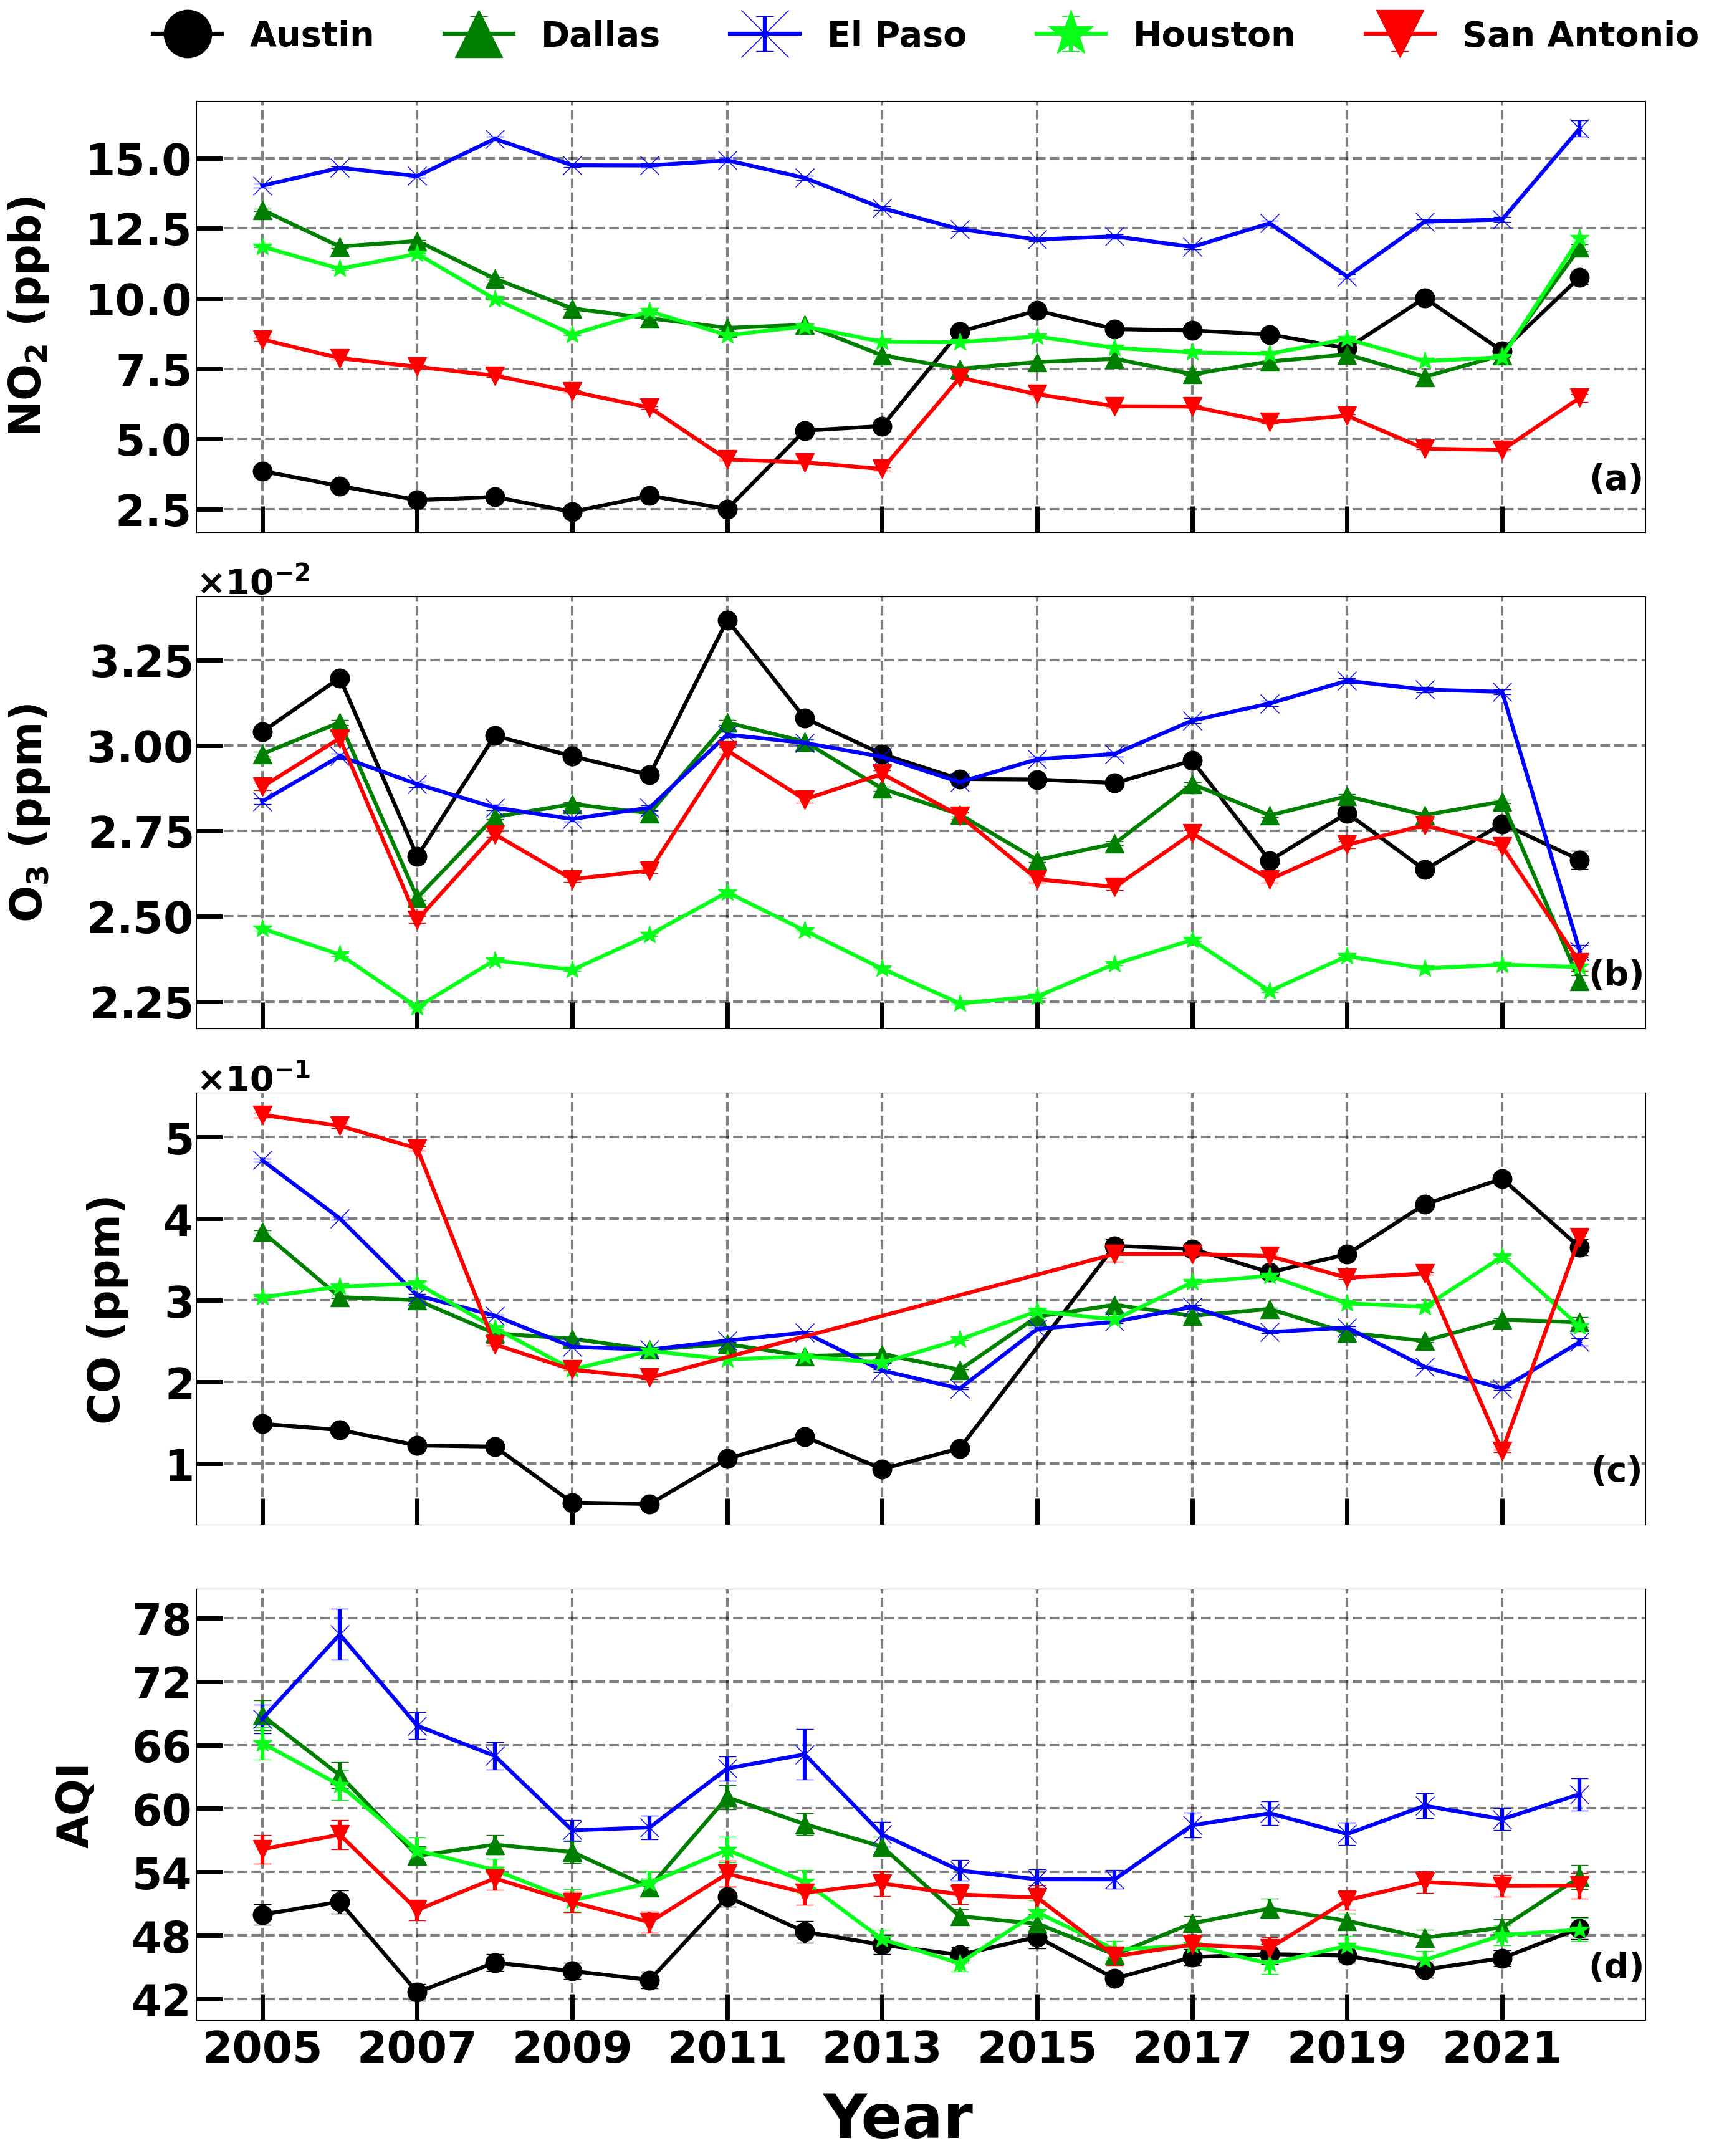

In [113]:
%%time

fig, axes = plt.subplots(4, 1, figsize=(30, 40))
cols = ['City', 'Year', 'mean', 'std', 'count']
image = 1


for idx, current_pollutant in enumerate(['NO2', 'O3', 'CO', 'AQI']):
    print("CURRENT POLLUTANT: ", current_pollutant_local)
    ax1 = plt.subplot(4,1,idx+1) 
    pollutant_df = df[df.Pollutant == current_pollutant].copy()
    print("AVAILABLE POLLUTANTS: ", pollutant_df['Parameter Name'].unique())
    print("AVAILABLE CITIES: ", pollutant_df['City'].unique())
    print("UNIT: ", pollutant_df['Units of Measure'].unique())
    aggregate = pollutant_df.groupby(['City', 'Year']).agg({'Value': ['mean', 'std', 'count']}).reset_index()
    aggregate.columns = cols
    print("CITIES IN AGGREGATION FOR POLLUTANT ", current_pollutant, " are: ", aggregate.City.unique())
    
    # Iterating through each city for current pollutant
    for idx1, city in enumerate(aggregate.City.unique()):
        print("SELECTED CITY: ", city)
        aggregate_for_a_city = aggregate[aggregate.City == city].copy()
        aggregate_for_a_city = aggregate_for_a_city.reset_index(drop = True)
        aggregate_for_a_city['Standard_Error'] = aggregate_for_a_city['std'] / np.sqrt(aggregate_for_a_city['count'])
        aggregate_for_a_city = aggregate_for_a_city[['Year', 'mean', 'Standard_Error']]
        
        if aggregate_for_a_city.shape[0] < len(month_ranges):
            print("INPUT SHAPE: ", aggregate_for_a_city.shape)
            aggregate_for_a_city = add_null_values_to_missing_dates(aggregate_for_a_city)
            print("OUTPUT SHAPE: ", aggregate_for_a_city.shape)
        
        plot1 = ax1.errorbar(
          x = aggregate_for_a_city['Year'], 
          y = aggregate_for_a_city['mean'], 
          yerr = aggregate_for_a_city['Standard_Error'],
          capsize = 10,
          fmt = color_and_marker[city][1], 
          color = color_and_marker[city][0], 
          markersize = 22,  
          alpha = 1,
          linewidth = 4.5, 
          linestyle = '-', label = city)
        
    ax1.set_ylabel(ylabels_local[idx], fontsize = 50, labelpad = 40, fontweight = 'bold')
    ax1.tick_params(which='both', width=5)
    ax1.tick_params(which='major', length=30)
    ax1.tick_params(which='minor', length=10)
    ax1.tick_params(which = 'both', direction = 'in')
    ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 3, color = 'black')
    ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
    
    if current_pollutant in ['Lead', "O3"]:
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
    else:
         ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
            
    
    if current_pollutant in ['CO']:
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
        
    plt.xticks(range(2005, 2023, 2))
    ax1.tick_params(axis ='y', labelbottom=True, labelsize = 50, pad = 5) 
    ax1.tick_params(axis ='x', labelbottom=True, labelsize = 50, pad = 10) 

    if image == 1:
        lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        leg = fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.085, 0.925), \
                         fontsize = 40, ncol = 5,markerscale=2.5, frameon=False)
    
    
    
    ax1.text(0.98, 0.1, "("+fig_names[idx]+")", horizontalalignment='center',\
         transform=ax1.transAxes, fontsize = 40, rotation = 'horizontal')
    
    
    if image not in [4]:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
        
#     if current_pollutant in ['Lead', "O3", 'CO']:
#         ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
#     else:
#          ax1.yaxis.set_major_locator(plt.MaxNLocator(8))

    if current_pollutant in ["O3", "CO"]:
        from matplotlib import ticker
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_scientific(True) 
        formatter.set_powerlimits((-1,0)) 
        ax1.yaxis.set_major_formatter(formatter)
        ax1.ticklabel_format(style='scientific', axis = 'y') 
        t = ax1.yaxis.get_offset_text()
        t.set_size(40) 
        
    # if current_pollut
    #     ax1.set_yticks([2.2e-2, 2.5e-2, 2.8e-2, 3.1e-2])

#     if image == 1:
#         ax1.set_ylim([0, 20])
    
    print("\n")
    image += 1
    # break

# fig.delaxes(axes[3][1])

### SUBPLOT SETTINGS -----------------------------
plt.subplots_adjust(wspace=0.2, hspace=0.15)
fig.text(0.5, 0.07, 'Year', ha='center', va='center', fontsize = 70)
# plt.savefig('Yealy_TimeseriesVariation.jpg',  bbox_inches='tight', dpi = 500)

## Testing Yearly

In [195]:
available_pollutants

array(['NO2', 'O3', 'CO', 'Lead', 'PM25', 'SO2', 'AQI'], dtype=object)

In [199]:
a['Parameter Name'].unique()

array(['Nitrogen dioxide (NO2)'], dtype=object)

['AQI']
['Unitless']
CPU times: total: 625 ms
Wall time: 844 ms


''

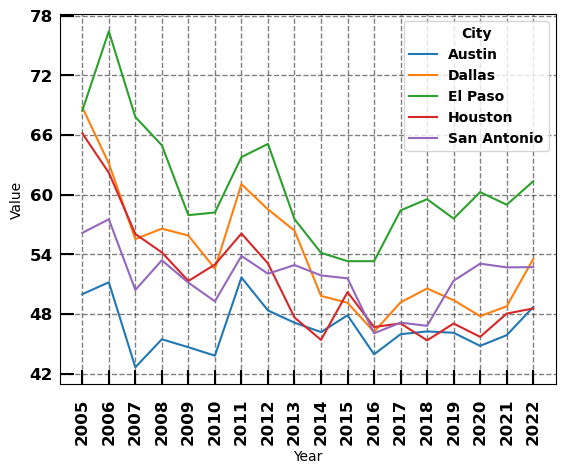

In [326]:
%%time

a = df[df.Pollutant == 'AQI']
print(a['Parameter Name'].unique())
print(a['Units of Measure'].unique())
b = a.groupby(['City', 'Year'])['Value'].mean().reset_index()

ax1 = plt.subplot()
plot1 = sns.lineplot(x = 'Year', y = 'Value', hue = 'City', data = b, ax = ax1)
ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
ax1.tick_params(axis ='y', labelbottom=True, labelsize = 12, pad = 5) 
ax1.tick_params(axis ='x', labelbottom=True, labelsize = 12, pad = 10) 
ax1.tick_params(which='both', width=1.5)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=6)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
plt.xticks(range(2005, 2023, 1))
plt.xticks(rotation = 90)
;
;

# Durinal Variation

In [114]:
# Number of null values for each pollutant
df.Time_Local.isnull().groupby(df['Pollutant']).sum()

Pollutant
AQI     46376
CO          0
Lead     4690
NO2         0
O3          0
PM25        0
SO2         0
Name: Time_Local, dtype: int64

In [115]:
ylabels.remove('Lead ($\\mu$g $\\mathregular{m^{-3}}$)')

In [116]:
ylabels

['NO$_2$ (ppb)',
 'O$_3$ (ppm)',
 'CO (ppm)',
 'PM$_{2.5}$ ($\\mu$g $\\mathregular{m^{-3}}$)',
 'SO$_2$ (ppb)',
 'AQI']

CURRENT POLLUTANT:  NO2
UNIT:  ['Parts per billion']
AVAILABLE POLLUTANTS:  ['Nitrogen dioxide (NO2)']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']
CITIES IN AGGREGATION FOR POLLUTANT  NO2  are:  ['Austin' 'Dallas' 'El Paso' 'Houston' 'San Antonio']
SELECTED CITY:  Austin
AGGREGATE SHAPE MUST BE 24 rows FOR COMPLETE DATA:  (24, 3)
SELECTED CITY:  Dallas
AGGREGATE SHAPE MUST BE 24 rows FOR COMPLETE DATA:  (24, 3)
SELECTED CITY:  El Paso
AGGREGATE SHAPE MUST BE 24 rows FOR COMPLETE DATA:  (24, 3)
SELECTED CITY:  Houston
AGGREGATE SHAPE MUST BE 24 rows FOR COMPLETE DATA:  (24, 3)
SELECTED CITY:  San Antonio
AGGREGATE SHAPE MUST BE 24 rows FOR COMPLETE DATA:  (24, 3)


CURRENT POLLUTANT:  O3
UNIT:  ['Parts per million']
AVAILABLE POLLUTANTS:  ['Ozone']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']
CITIES IN AGGREGATION FOR POLLUTANT  O3  are:  ['Austin' 'Dallas' 'El Paso' 'Houston' 'San Antonio']
SELECTED CITY:  Austin
AGGREGATE SHAPE 

Text(0.5, 0.075, 'Hour')

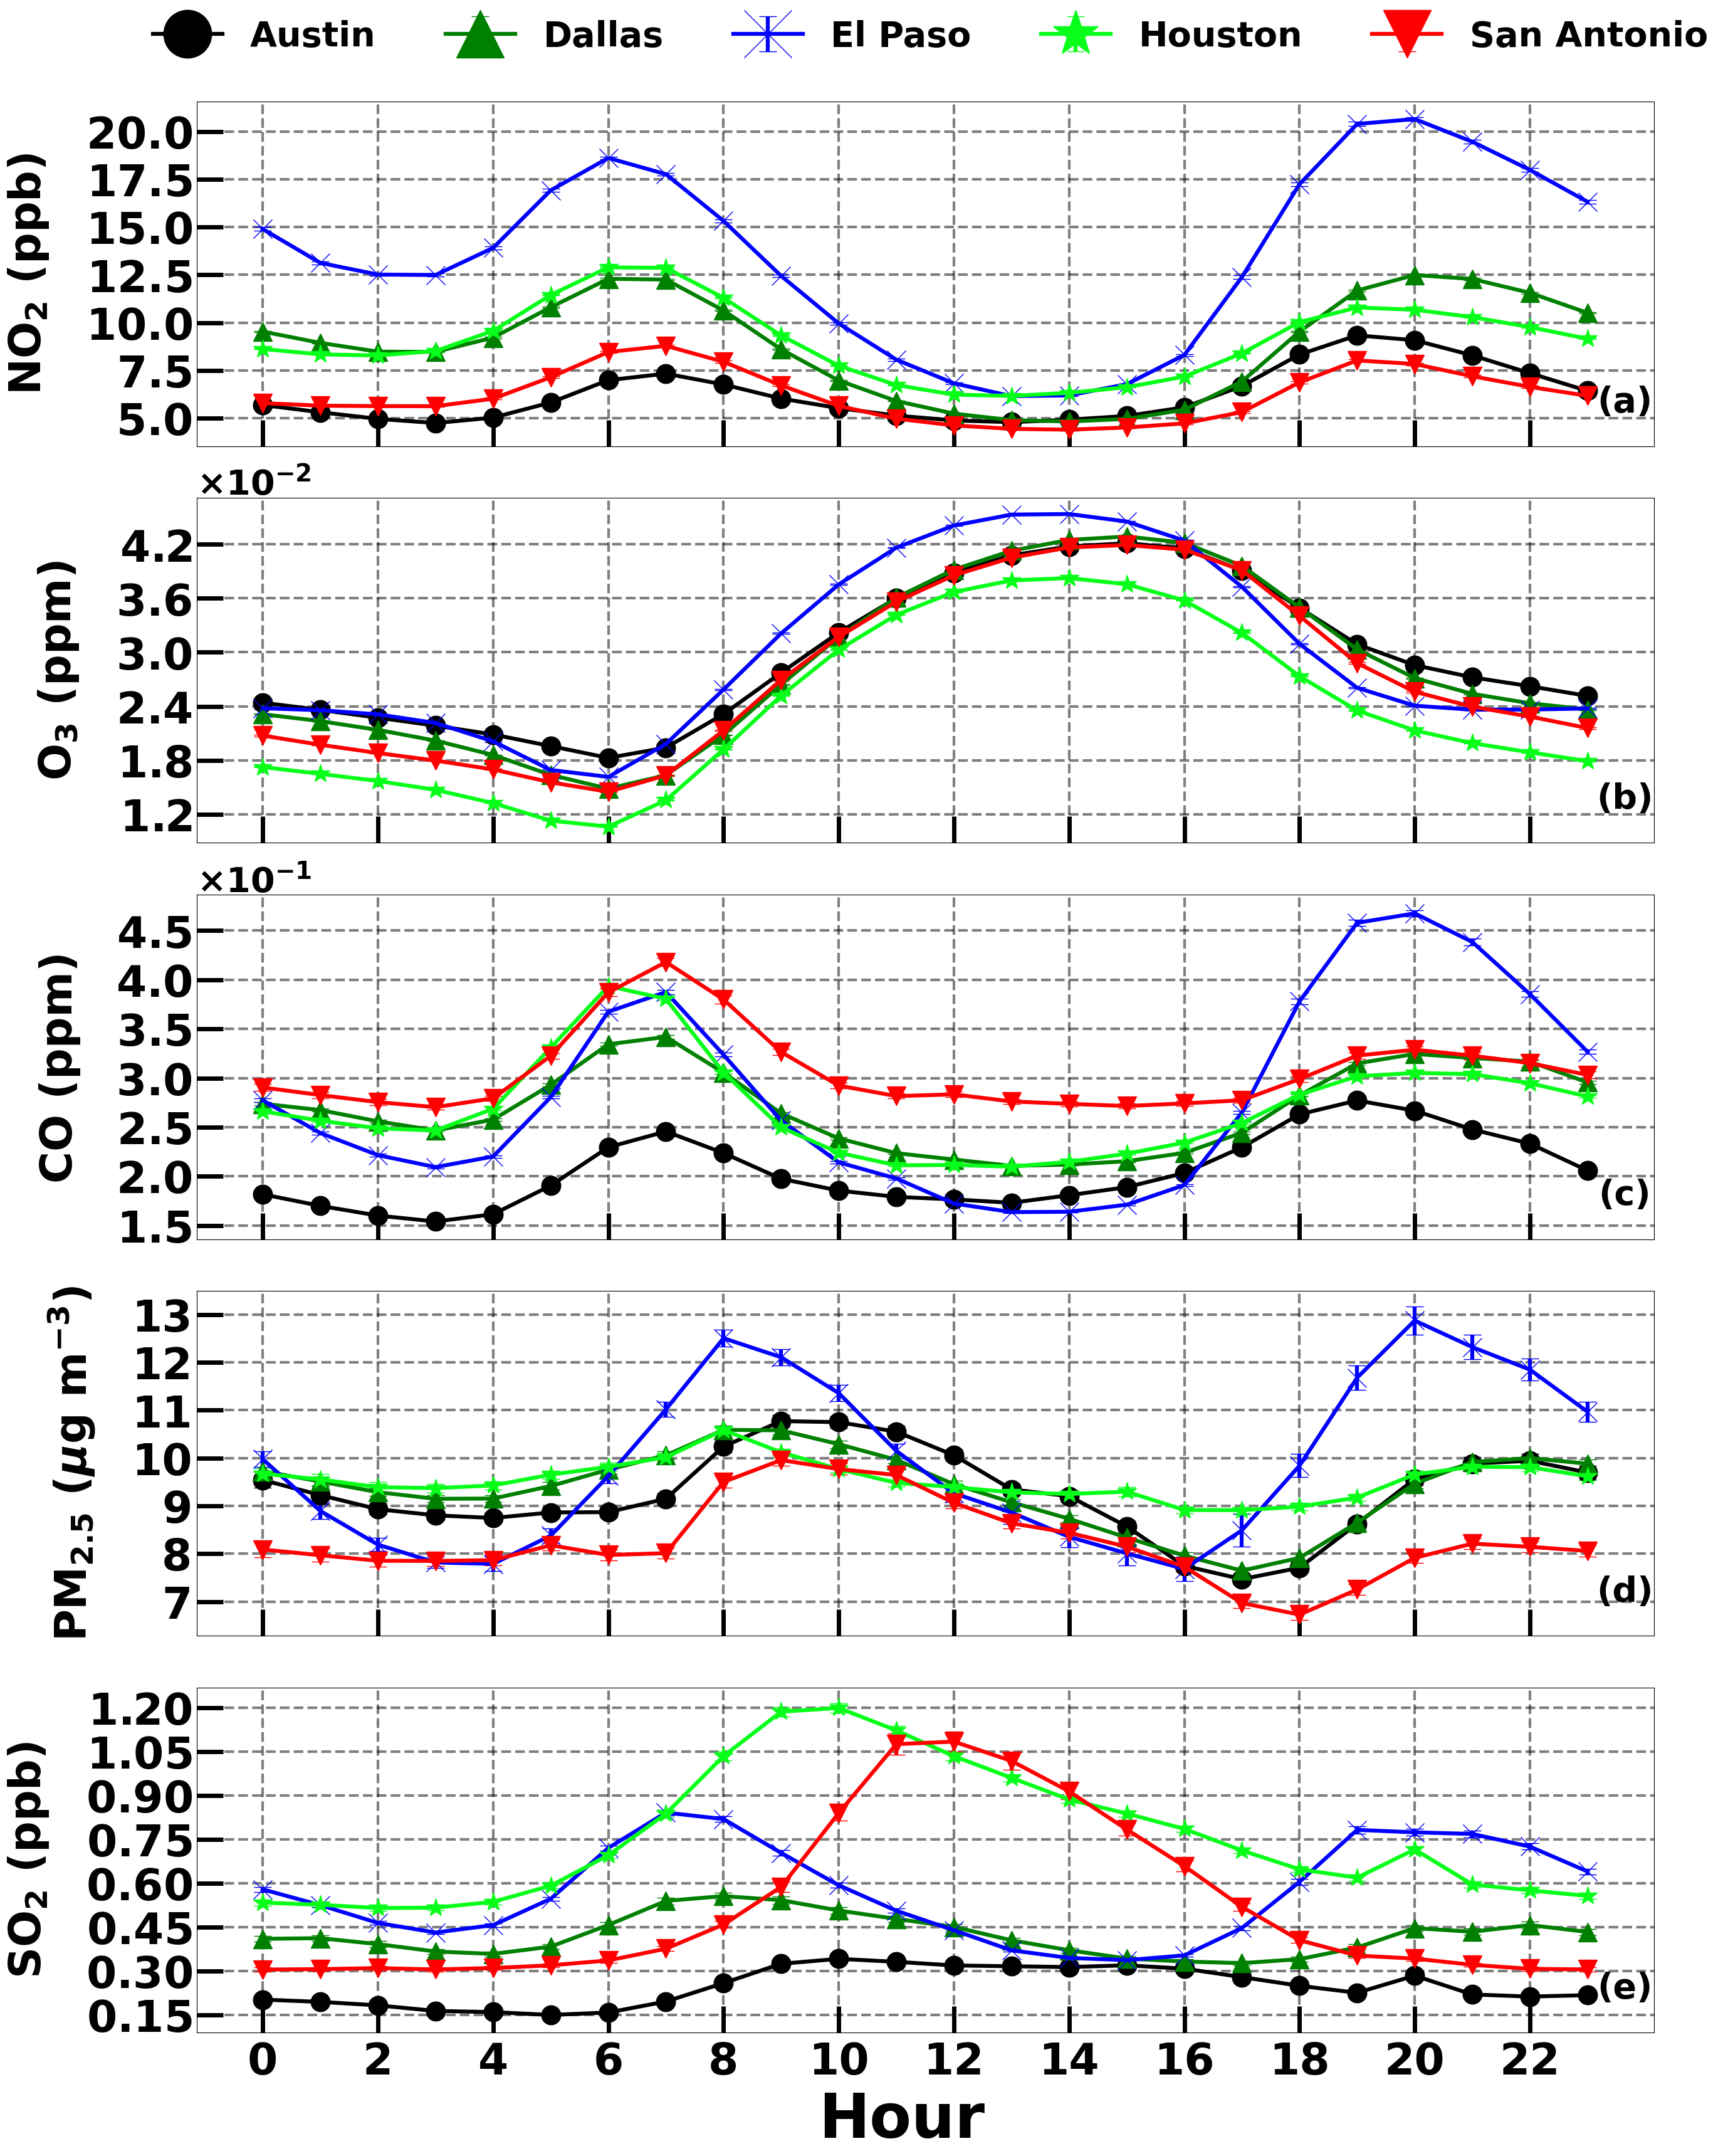

In [117]:
%%time

fig, axes = plt.subplots(5, 1, figsize=(30, 40))
cols = ['City', 'Time', 'mean', 'std', 'count']
image = 1


for idx, current_pollutant in enumerate(['NO2', 'O3', 'CO', 'PM25', 'SO2']):
    print("CURRENT POLLUTANT: ", current_pollutant)
    ax1 = plt.subplot(5, 1, idx+1) 
    pollutant_df = df[df.Pollutant == current_pollutant].copy()
    pollutant_df['Time'] = pollutant_df.Time_Local.apply(lambda x : int(x[:2]))
    print("UNIT: ", pollutant_df['Units of Measure'].unique())
    print("AVAILABLE POLLUTANTS: ", pollutant_df['Parameter Name'].unique())
    print("AVAILABLE CITIES: ", pollutant_df['City'].unique())
    aggregate = pollutant_df.groupby(['City', 'Time']).agg({'Value': ['mean', 'std', 'count']}).reset_index()
    aggregate.columns = cols
    print("CITIES IN AGGREGATION FOR POLLUTANT ", current_pollutant, " are: ", aggregate.City.unique())
    
    # Iterating through each city for current pollutant
    for idx1, city in enumerate(aggregate.City.unique()):
        print("SELECTED CITY: ", city)
        aggregate_for_a_city = aggregate[aggregate.City == city].copy()
        aggregate_for_a_city = aggregate_for_a_city.reset_index(drop = True)
        aggregate_for_a_city['Standard_Error'] = aggregate_for_a_city['std'] / np.sqrt(aggregate_for_a_city['count'])
        aggregate_for_a_city = aggregate_for_a_city[['Time', 'mean', 'Standard_Error']]
        print("AGGREGATE SHAPE MUST BE 24 rows FOR COMPLETE DATA: ", aggregate_for_a_city.shape)
        
        # if aggregate_for_a_city.shape[0] < len(month_ranges):
        #     print("INPUT SHAPE: ", aggregate_for_a_city.shape)
        #     aggregate_for_a_city = add_null_values_to_missing_dates(aggregate_for_a_city)
        #     print("OUTPUT SHAPE: ", aggregate_for_a_city.shape)
        
        plot1 = ax1.errorbar(
          x = aggregate_for_a_city['Time'], 
          y = aggregate_for_a_city['mean'], 
          yerr = aggregate_for_a_city['Standard_Error'],
          capsize = 10,
          fmt = color_and_marker[city][1], 
          color = color_and_marker[city][0], 
          markersize = 22,  
          alpha = 1,
          linewidth = 4.5, 
          linestyle = '-', label = city)
        
    ax1.set_ylabel(ylabels[idx], fontsize = 50, labelpad = 40, fontweight = 'bold')
    ax1.tick_params(which='both', width=5)
    ax1.tick_params(which='major', length=30)
    ax1.tick_params(which='minor', length=10)
    ax1.tick_params(which = 'both', direction = 'in')
    ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 3, color = 'black')
    ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
    
    if current_pollutant in ['Lead', "O3"]:
        ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
    else:
         ax1.yaxis.set_major_locator(plt.MaxNLocator(8))
    plt.xticks(range(0, 24, 2))
    ax1.tick_params(axis ='y', labelbottom=True, labelsize = 50, pad = 5) 
    ax1.tick_params(axis ='x', labelbottom=True, labelsize = 50, pad = 10) 

    if image == 1:
        lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        leg = fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.085, 0.925), \
                         fontsize = 40, ncol = 5,markerscale=2.5, frameon=False)
    
    
    ax1.text(0.98, 0.1, "("+fig_names[idx]+")", horizontalalignment='center',\
         transform=ax1.transAxes, fontsize = 40, fontweight="bold", rotation = 'horizontal')
    
#     if image == 1:
#         ax1.set_ylim([2, 23])
    
    if image not in [5]:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
    from matplotlib import ticker
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)    
    
    
    if current_pollutant in ["O3", "CO", "SO2", "NO2"]:
        if current_pollutant == "NO2":
            formatter.set_powerlimits((0,2)) 
        
        elif current_pollutant == "SO2":
            formatter.set_powerlimits((0,1))
        else:
            formatter.set_powerlimits((0,1)) 

        ax1.yaxis.set_major_formatter(formatter)
        ax1.ticklabel_format(style='scientific', axis = 'y') 
        t = ax1.yaxis.get_offset_text()
        t.set_size(40) 
        
        # ax1.ticklabel_format(axis='y', style='sci', scilimits=(0.,0))
    
    print("\n")
    image += 1
    # break
    
# fig.delaxes(axes[2][1])

### SUBPLOT SETTINGS -----------------------------
plt.subplots_adjust(wspace=0.2, hspace=0.15)
fig.text(0.5, 0.075, 'Hour', ha='center', va='center', fontsize = 70)
# plt.savefig('Hourly_TimeseriesVariation.jpg',bbox_inches='tight', dpi = 500)

In [65]:
# %%time

# fig, axes = plt.subplots(3, 2, figsize=(50, 25))
# cols = ['City', 'Time', 'mean', 'std', 'count']
# image = 1


# for idx, current_pollutant in enumerate(['NO2', 'O3', 'CO', 'PM25', 'SO2']):
#     print("CURRENT POLLUTANT: ", current_pollutant)
#     ax1 = plt.subplot(3,2,idx+1) 
#     pollutant_df = df[df.Pollutant == current_pollutant].copy()
#     pollutant_df['Time'] = pollutant_df.Time_Local.apply(lambda x : int(x[:2]))
    
#     print("AVAILABLE POLLUTANTS: ", pollutant_df['Parameter Name'].unique())
#     print("AVAILABLE CITIES: ", pollutant_df['City'].unique())
#     aggregate = pollutant_df.groupby(['City', 'Time']).agg({'Value': ['mean', 'std', 'count']}).reset_index()
#     aggregate.columns = cols
#     print("CITIES IN AGGREGATION FOR POLLUTANT ", current_pollutant, " are: ", aggregate.City.unique())
    
#     # Iterating through each city for current pollutant
#     for idx1, city in enumerate(aggregate.City.unique()):
#         print("SELECTED CITY: ", city)
#         aggregate_for_a_city = aggregate[aggregate.City == city].copy()
#         aggregate_for_a_city = aggregate_for_a_city.reset_index(drop = True)
#         aggregate_for_a_city['Standard_Error'] = aggregate_for_a_city['std'] / np.sqrt(aggregate_for_a_city['count'])
#         aggregate_for_a_city = aggregate_for_a_city[['Time', 'mean', 'Standard_Error']]
#         print("AGGREGATE SHAPE MUST BE 24 rows FOR COMPLETE DATA: ", aggregate_for_a_city.shape)
        
#         # if aggregate_for_a_city.shape[0] < len(month_ranges):
#         #     print("INPUT SHAPE: ", aggregate_for_a_city.shape)
#         #     aggregate_for_a_city = add_null_values_to_missing_dates(aggregate_for_a_city)
#         #     print("OUTPUT SHAPE: ", aggregate_for_a_city.shape)
        
#         plot1 = ax1.errorbar(
#           x = aggregate_for_a_city['Time'], 
#           y = aggregate_for_a_city['mean'], 
#           yerr = aggregate_for_a_city['Standard_Error'],
#           capsize = 10,
#           fmt = color_and_marker[city][1], 
#           color = color_and_marker[city][0], 
#           markersize = 22,  
#           alpha = 1,
#           linewidth = 4.5, 
#           linestyle = '-', label = city)
        
#     ax1.set_ylabel(ylabels[idx], fontsize = 35, labelpad = 40)
#     ax1.tick_params(which='both', width=2)
#     ax1.tick_params(which='major', length=18)
#     ax1.tick_params(which='minor', length=10)
#     ax1.tick_params(which = 'both', direction = 'in')
#     ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
#     ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
    
#     if current_pollutant in ['Lead', "O3"]:
#         ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
#     else:
#          ax1.yaxis.set_major_locator(plt.MaxNLocator(8))
#     plt.xticks(range(0, 24, 2))
#     ax1.tick_params(axis ='y', labelbottom=True, labelsize = 30, pad = 5) 
#     ax1.tick_params(axis ='x', labelbottom=True, labelsize = 30, pad = 10) 

#     if image == 1:
#         lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
#         lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#         leg = fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.25, 0.885), \
#                          fontsize = 27.5, ncol = 2,markerscale=1, frameon=False)
    
    
#     ax1.text(0.98, 0.1, "("+fig_names[idx]+")", horizontalalignment='center',\
#          transform=ax1.transAxes, fontsize = 30, fontweight="bold", rotation = 'horizontal')
    
    
#     if image not in [5, 4]:
#         plt.setp(ax1.get_xticklabels(), visible=False)
    
#     print("\n")
#     image += 1
    
# fig.delaxes(axes[2][1])

# ### SUBPLOT SETTINGS -----------------------------
# plt.subplots_adjust(wspace=0.2, hspace=0.1)
# fig.text(0.5, 0.075, 'Hour', ha='center', va='center', fontsize = 50)
# plt.savefig('Hourly_TimeseriesVariation.jpg',bbox_inches='tight', dpi = 500)

## Testing Durial Variation

In [ ]:
available_pollutants

['Nitrogen dioxide (NO2)']
['Parts per billion']
Time
0     [00:00]
1     [01:00]
2     [02:00]
3     [03:00]
4     [04:00]
5     [05:00]
6     [06:00]
7     [07:00]
8     [08:00]
9     [09:00]
10    [10:00]
11    [11:00]
12    [12:00]
13    [13:00]
14    [14:00]
15    [15:00]
16    [16:00]
17    [17:00]
18    [18:00]
19    [19:00]
20    [20:00]
21    [21:00]
22    [22:00]
23    [23:00]
Name: Time_Local, dtype: object
CPU times: total: 4.02 s
Wall time: 4.56 s


''

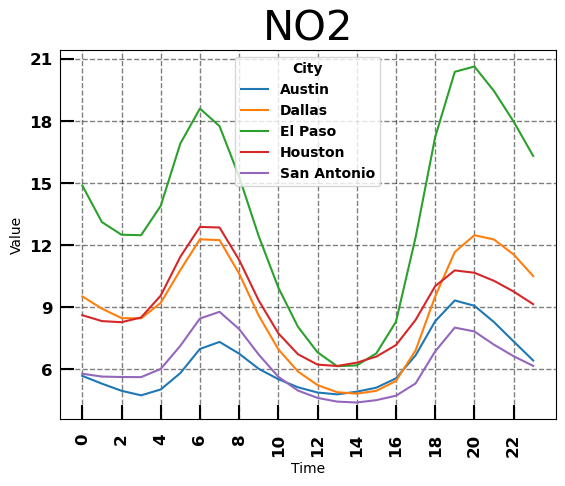

In [336]:
%%time

pol = 'NO2'
a = df[df.Pollutant == pol]
print(a['Parameter Name'].unique())
print(a['Units of Measure'].unique())
a['Time'] = a.Time_Local.apply(lambda x : int(x[:2]))
print(a.groupby('Time')['Time_Local'].unique())
b = a.groupby(['City', 'Time'])['Value'].mean().reset_index()

ax1 = plt.subplot()
plot1 = sns.lineplot(x = 'Time', y = 'Value', hue = 'City', data = b, ax = ax1)
ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
ax1.tick_params(axis ='y', labelbottom=True, labelsize = 12, pad = 5) 
ax1.tick_params(axis ='x', labelbottom=True, labelsize = 12, pad = 10) 
ax1.tick_params(which='both', width=1.5)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=6)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
ax1.set_title(pol, fontsize = 30)
plt.xticks(range(0, 24, 2))
plt.xticks(rotation = 90)
;
;

# Seasonal Variation

In [212]:
months_and_seasons = {
        'Dec-Jan-Feb': [12, 1, 2],
        'Mar-Apr-May': [3, 4, 5],
        'Jun-Jul-Aug': [6, 7, 8],
        'Sep-Oct-Nov': [9,10, 11]
}
def return_season_for_a_month(m):
    for key, val in months_and_seasons.items():
        if m in val:
            return key

In [213]:
%%time

df['Season'] = df.Month.apply(lambda x : return_season_for_a_month(x))

CPU times: total: 6.19 s
Wall time: 6.91 s


In [214]:
df.groupby('Season')['Month'].unique()

Season
Dec-Jan-Feb     [1, 2, 12]
Jun-Jul-Aug      [6, 7, 8]
Mar-Apr-May      [3, 4, 5]
Sep-Oct-Nov    [9, 10, 11]
Name: Month, dtype: object

In [215]:
df.Pollutant.unique(), available_pollutants

(array(['NO2', 'O3', 'CO', 'Lead', 'PM25', 'SO2', 'AQI'], dtype=object),
 array(['NO2', 'O3', 'CO', 'Lead', 'PM25', 'SO2', 'AQI'], dtype=object))

In [216]:
ylabels = ['NO$_2$ (ppb)', 'O$_3$ (ppm)', 'CO (ppm)', 'Lead ($\\mu$g $\mathregular{m^{-3}}$)', 'PM$_{2.5}$ ($\\mu$g $\mathregular{m^{-3}}$)', 'SO$_2$ (ppb)', 'AQI']

In [217]:
color_and_marker = {
    'San Antonio': ['red', 'v'],
    'Dallas': ['green', '^'],
    'El Paso': ['blue', 'x'],
    'Austin': ['black', 'o'],
    'Houston': ['#07FF19','*'],
}

In [218]:
palette = {
    'San Antonio': 'red',
    'Dallas': 'green',
    'El Paso': 'blue',
    'Austin': 'black',
    'Houston': '#07FF19',
}

In [219]:
import matplotlib

CURRENT POLLUTANT:  NO2
AVAILABLE POLLUTANTS:  ['Nitrogen dioxide (NO2)']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']


CURRENT POLLUTANT:  O3
AVAILABLE POLLUTANTS:  ['Ozone']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']


CURRENT POLLUTANT:  CO
AVAILABLE POLLUTANTS:  ['Carbon monoxide']
AVAILABLE CITIES:  ['San Antonio' 'Dallas' 'El Paso' 'Houston' 'Austin']


CURRENT POLLUTANT:  Lead
AVAILABLE POLLUTANTS:  ['Lead (TSP) STP' 'Lead (TSP) LC']
AVAILABLE CITIES:  ['Dallas' 'El Paso' 'Houston' 'San Antonio']


CURRENT POLLUTANT:  PM25
AVAILABLE POLLUTANTS:  ['PM2.5 - Local Conditions']
AVAILABLE CITIES:  ['Dallas' 'El Paso' 'Houston' 'Austin' 'San Antonio']


CURRENT POLLUTANT:  SO2
AVAILABLE POLLUTANTS:  ['Sulfur dioxide']
AVAILABLE CITIES:  ['Dallas' 'El Paso' 'Houston' 'Austin' 'San Antonio']


CURRENT POLLUTANT:  AQI
AVAILABLE POLLUTANTS:  ['AQI']
AVAILABLE CITIES:  ['San Antonio' 'Houston' 'Dallas' 'El Paso' 'Austin']


CPU tim

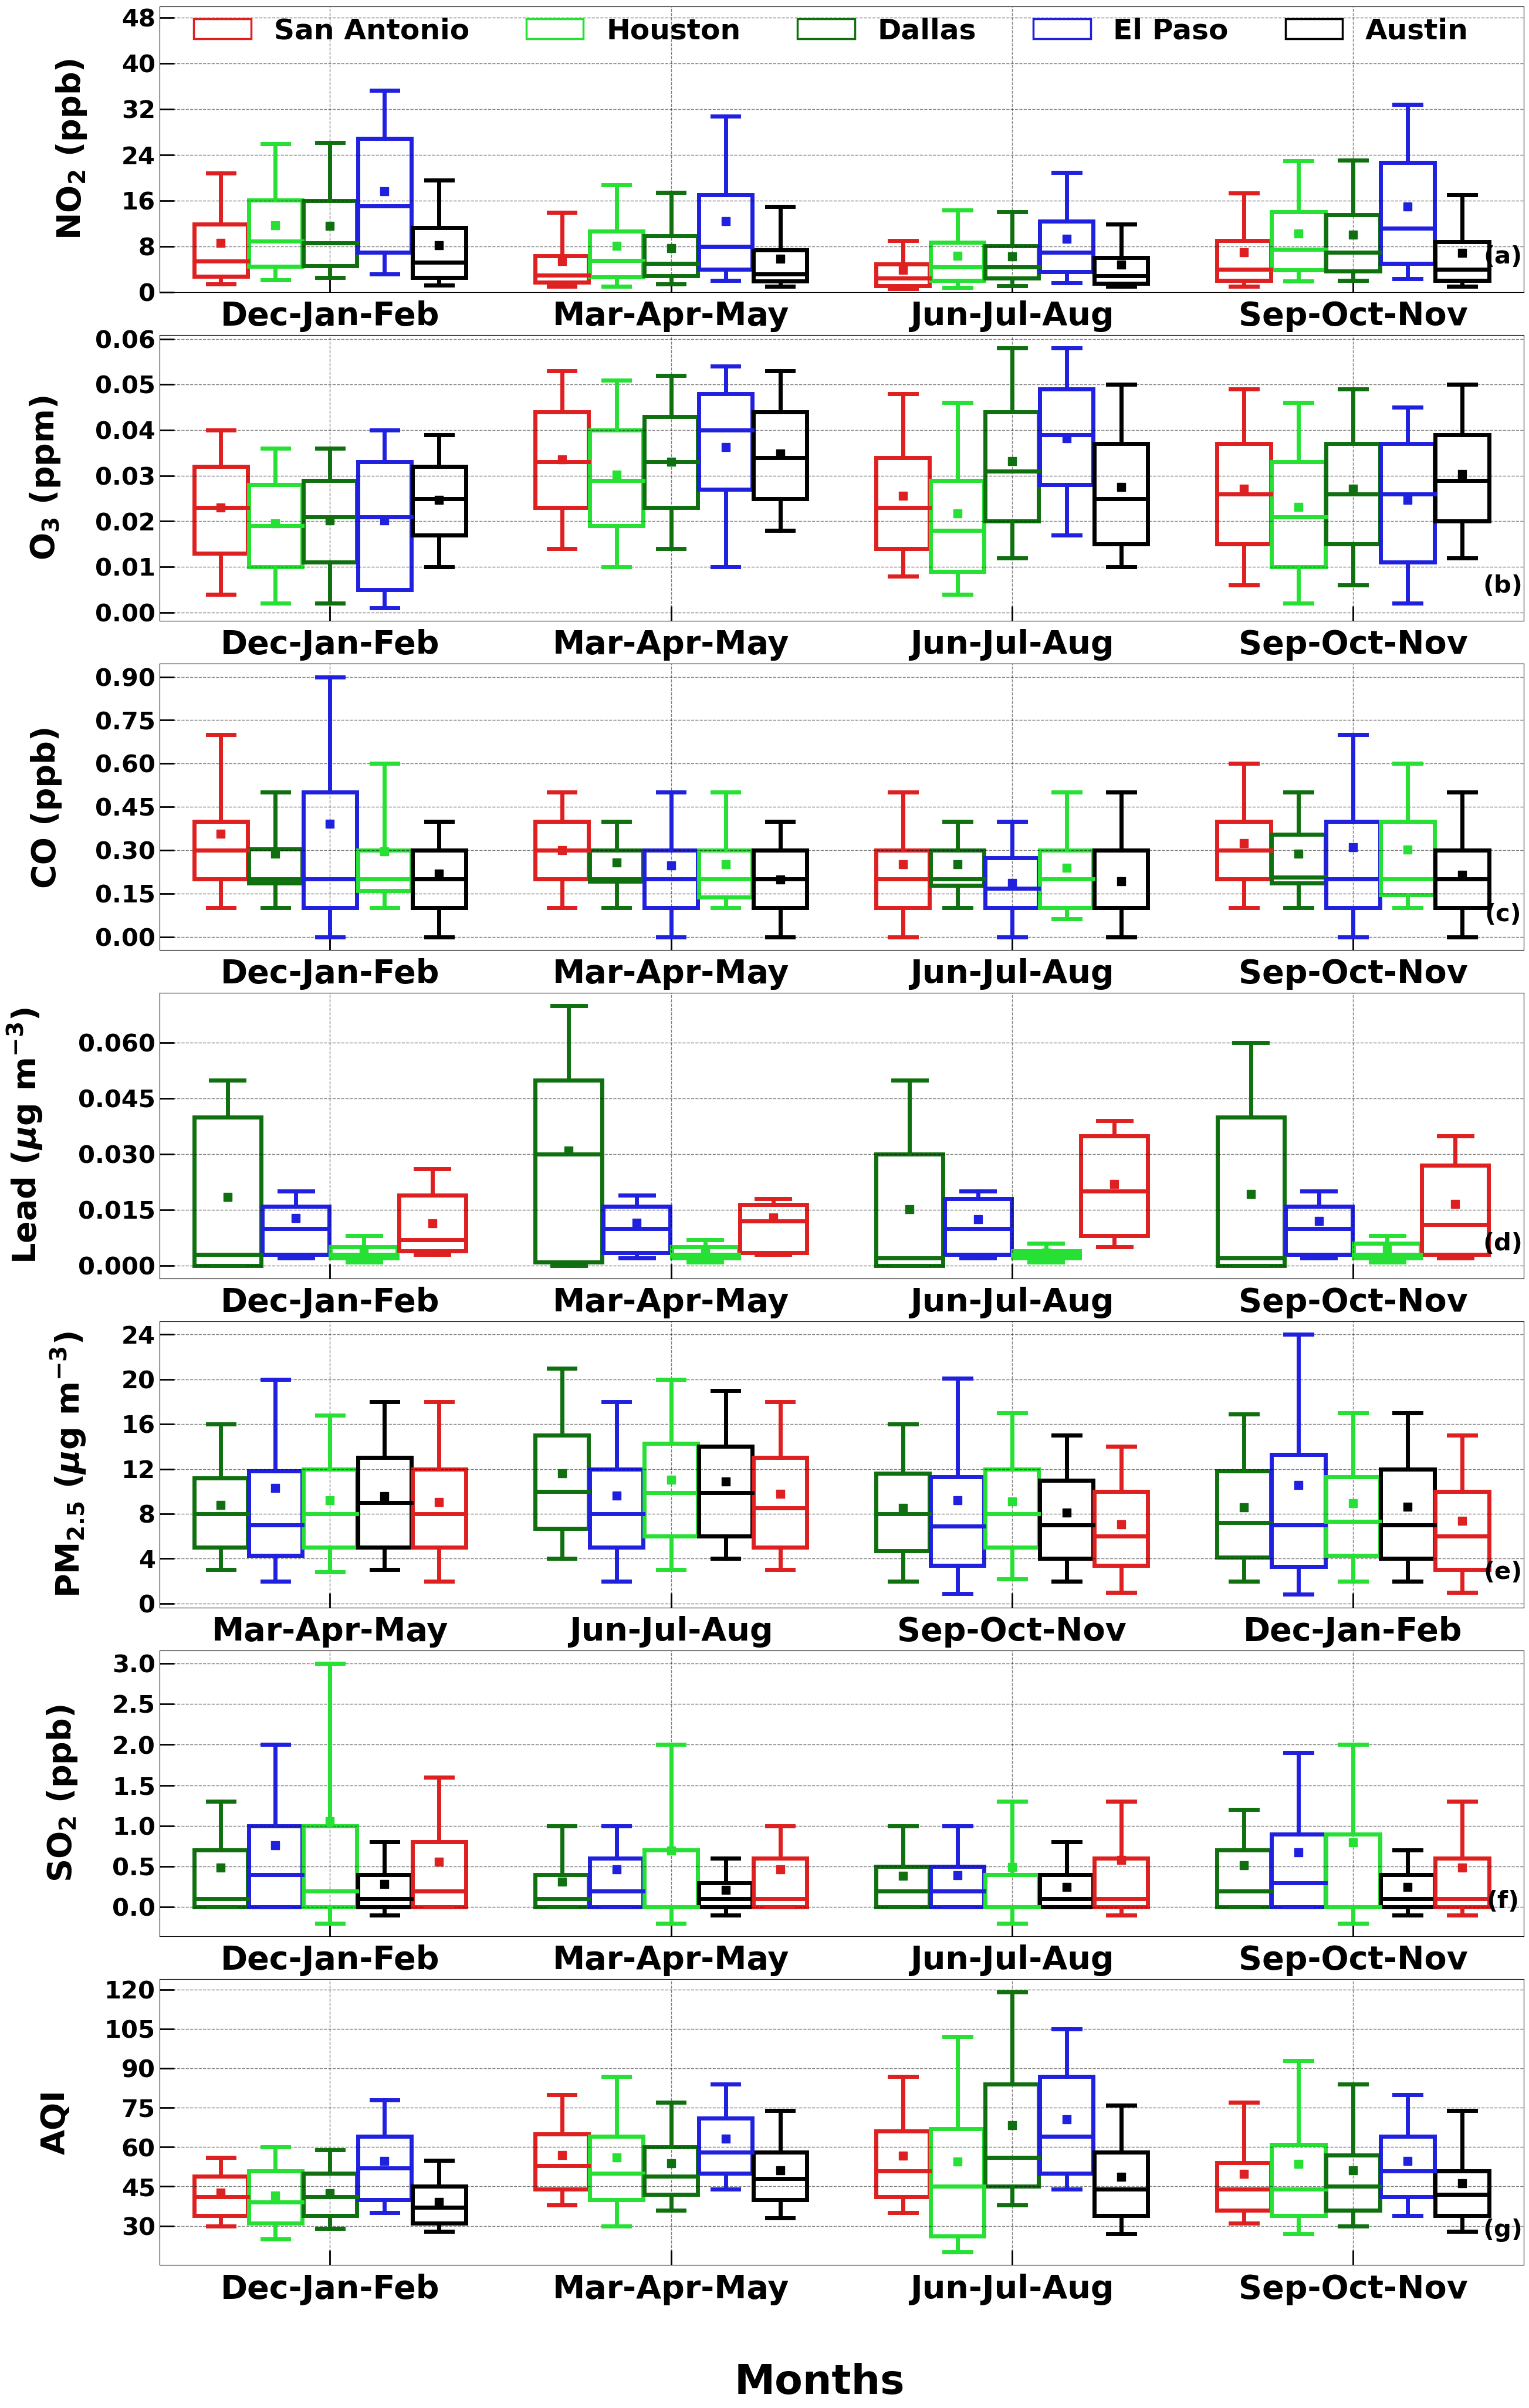

In [228]:
%%time

fig, axes = plt.subplots(7, 1, figsize=(30, 50))
cols = ['Original_City', 'Year', 'mean', 'std', 'count']
image = 1

for idx, current_pollutant in enumerate(available_pollutants):
    print("CURRENT POLLUTANT: ", current_pollutant)
    ax1 = plt.subplot(7,1,idx+1) 
    pollutant_df = df[df.Pollutant == current_pollutant].copy()
    print("AVAILABLE POLLUTANTS: ", pollutant_df['Parameter Name'].unique())
    print("AVAILABLE CITIES: ", pollutant_df['City'].unique())

    
    p = sns.boxplot(x = 'Season', y = 'Value', hue = 'City', data = pollutant_df, whis = [10, 90], \
                     showfliers =  False, palette = palette, showmeans = True, meanprops = {'marker':'s', 'markersize':10},\
                   linewidth = 5)
    
    ax1.set_xlabel('')
    ax1.set_ylabel('')

    box_patches = [patch for patch in ax1.patches if type(patch) == matplotlib.patches.PathPatch]
    if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
        box_patches = ax1.artists
    num_patches = len(box_patches)
    lines_per_boxplot = len(ax1.lines) // num_patches
    for i, patch in enumerate(box_patches):

        # Set the linecolor on the patch to the facecolor, and set the facecolor to None
        col = patch.get_facecolor()
        patch.set_edgecolor(col)
        patch.set_facecolor('None')


        # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same color as above
        for line in ax1.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
            line.set_color(col)
            line.set_mfc(col)  # facecolor of fliers
            line.set_mec(col)  # edgecolor of fliers

    # Also fix the legend
    for legpatch in ax1.get_legend().get_patches():
        col = legpatch.get_facecolor()
        legpatch.set_edgecolor(col)
        legpatch.set_facecolor('None')
                    
    if (idx+1) == 1:
        ax1.set_ylim([0, 48])
        
    ax1.set_ylabel(ylabels[idx], fontsize = 40, labelpad = 40, fontweight = 'bold')
    ax1.tick_params(which='both', width=2)
    ax1.tick_params(which='major', length=18)
    ax1.tick_params(which='minor', length=10)
    ax1.tick_params(which = 'both', direction = 'in')
    ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
    ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
    
    if current_pollutant in ['Lead', "O3", 'CO']:
        ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
    else:
         ax1.yaxis.set_major_locator(plt.MaxNLocator(8))

    ax1.tick_params(axis ='y', labelbottom=True, labelsize = 30, pad = 5) 
    ax1.tick_params(axis ='x', labelbottom=True, labelsize = 40, pad = 10) 

    if image == 1:
        lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        markers = ax1.get_legend().get_patches()
        leg = fig.legend(markers, labels, loc="upper left", bbox_to_anchor=(0.13, 0.885), \
                         fontsize = 35, ncol = 5,markerscale=45, frameon=False)
        # text_color = ['green', 'red', 'blue', 'black',  '#07FF19']
        # for i, text in enumerate(leg.get_texts()):
        #     text.set_color(text_color[i])
        
    # ax1.legend(loc = 'best', fontsize = 25)
    ax1.get_legend().remove()
    ax1.text(0.985, 0.1, "("+fig_names[idx]+")", horizontalalignment='center',\
         transform=ax1.transAxes, fontsize = 30, fontweight="bold", rotation = 'horizontal')
    
    
    # if image not in [7]:
    #     plt.setp(ax1.get_xticklabels(), visible=False, fontsize = 40)
        
    if image == 1:
        ax1.set_ylim([0, 50])
    ax1.xaxis.label.set_size(60)

    print("\n")
    image += 1
    # break
    
# fig.delaxes(axes[3][1])
### SUBPLOT SETTINGS -----------------------------
plt.subplots_adjust(wspace=0.2, hspace=0.15)
fig.text(0.5, 0.07, 'Months', ha='center', va='center', fontsize = 50)
plt.savefig('Seasonal_TimeseriesVariation.jpg',  bbox_inches='tight', dpi = 500)

In [221]:
p.get_xlabel()

''

## Testing Seasonal Boxplot

CPU times: total: 3.8 s
Wall time: 4.15 s


''

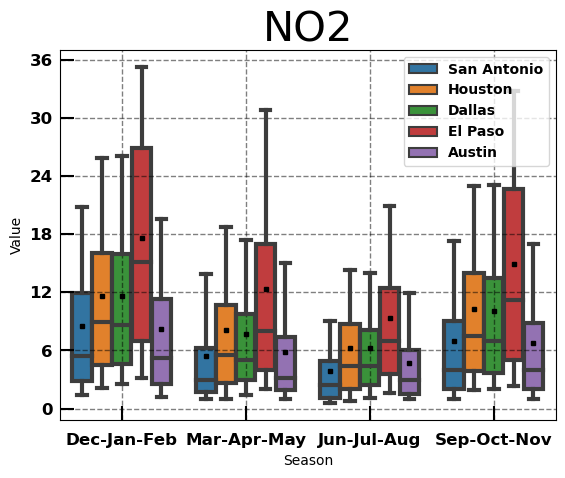

In [232]:
%%time

pol = 'NO2'
a = df[df.Pollutant == pol]

ax1 = plt.subplot()
p = sns.boxplot(x = 'Season', y = 'Value', hue = 'City', data = a, ax = ax1, whis=[10, 90], \
            showfliers = False, showmeans = True, linewidth = 3, \
                meanprops={"markersize":3, 'marker': 's', 'markerfacecolor':'black', 'markeredgecolor': 'black'})
ax1.legend(loc = 'best')
ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
ax1.tick_params(axis ='y', labelbottom=True, labelsize = 12, pad = 5) 
ax1.tick_params(axis ='x', labelbottom=True, labelsize = 12, pad = 10) 
ax1.tick_params(which='both', width=1.5)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=6)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
ax1.set_title(pol, fontsize = 30)
;
;

# Plotting Weekly

In [118]:
%%time

df['Day'] = df.Date_Local.apply(lambda  x : x.day_name())

CPU times: total: 1min 12s
Wall time: 1min 16s


In [119]:
df['Day'] = df['Day'].apply(lambda x : x[:3])

In [120]:
days_and_numbers = {
    'Sun': 1,
    'Mon': 2,
    'Tue': 3,
    'Wed': 4,
    'Thu' : 5,
    'Fri': 6,
    'Sat': 7
}

In [121]:
df['Day1'] = df['Day'].apply(lambda x : int(days_and_numbers[x]))

In [122]:
df.shape

(14139008, 13)

In [123]:
df.groupby('Day1')['Day'].unique()

Day1
1    [Sun]
2    [Mon]
3    [Tue]
4    [Wed]
5    [Thu]
6    [Fri]
7    [Sat]
Name: Day, dtype: object

In [124]:
palette = {
    'San Antonio': 'red',
    'Dallas': 'green',
    'El Paso': 'blue',
    'Austin': 'black',
    'Houston': '#07FF19',
}

In [125]:
%%time

averaged = df.groupby(['Pollutant' ,'Day1', 'City']).agg({'Value': ['mean', 'std', 'count']}).reset_index()
averaged.columns = ['Pollutant', 'Day1', 'City', 'mean', 'std', 'count']

CPU times: total: 1.59 s
Wall time: 1.7 s


In [126]:
averaged['standard_error'] = averaged['std'] / np.sqrt(averaged['count'])

In [127]:
averaged.Pollutant.unique()

array(['AQI', 'CO', 'Lead', 'NO2', 'O3', 'PM25', 'SO2'], dtype=object)

In [128]:
averaged = averaged[averaged.Pollutant.isin(['NO2', 'O3', 'CO', 'AQI'])]

In [129]:
ylabels_local = ['NO$_2$ (ppb)',
 'O$_3$ (ppm)',
 'CO (ppm)',
 'AQI']

CURRENT POLLUTANT:  NO2
AVAILABLE POLLUTANTS:  ['NO2']


CURRENT POLLUTANT:  O3
AVAILABLE POLLUTANTS:  ['O3']


CURRENT POLLUTANT:  CO
AVAILABLE POLLUTANTS:  ['CO']


CURRENT POLLUTANT:  AQI
AVAILABLE POLLUTANTS:  ['AQI']


CPU times: total: 266 ms
Wall time: 405 ms


Text(0.5, 0.055, 'Days')

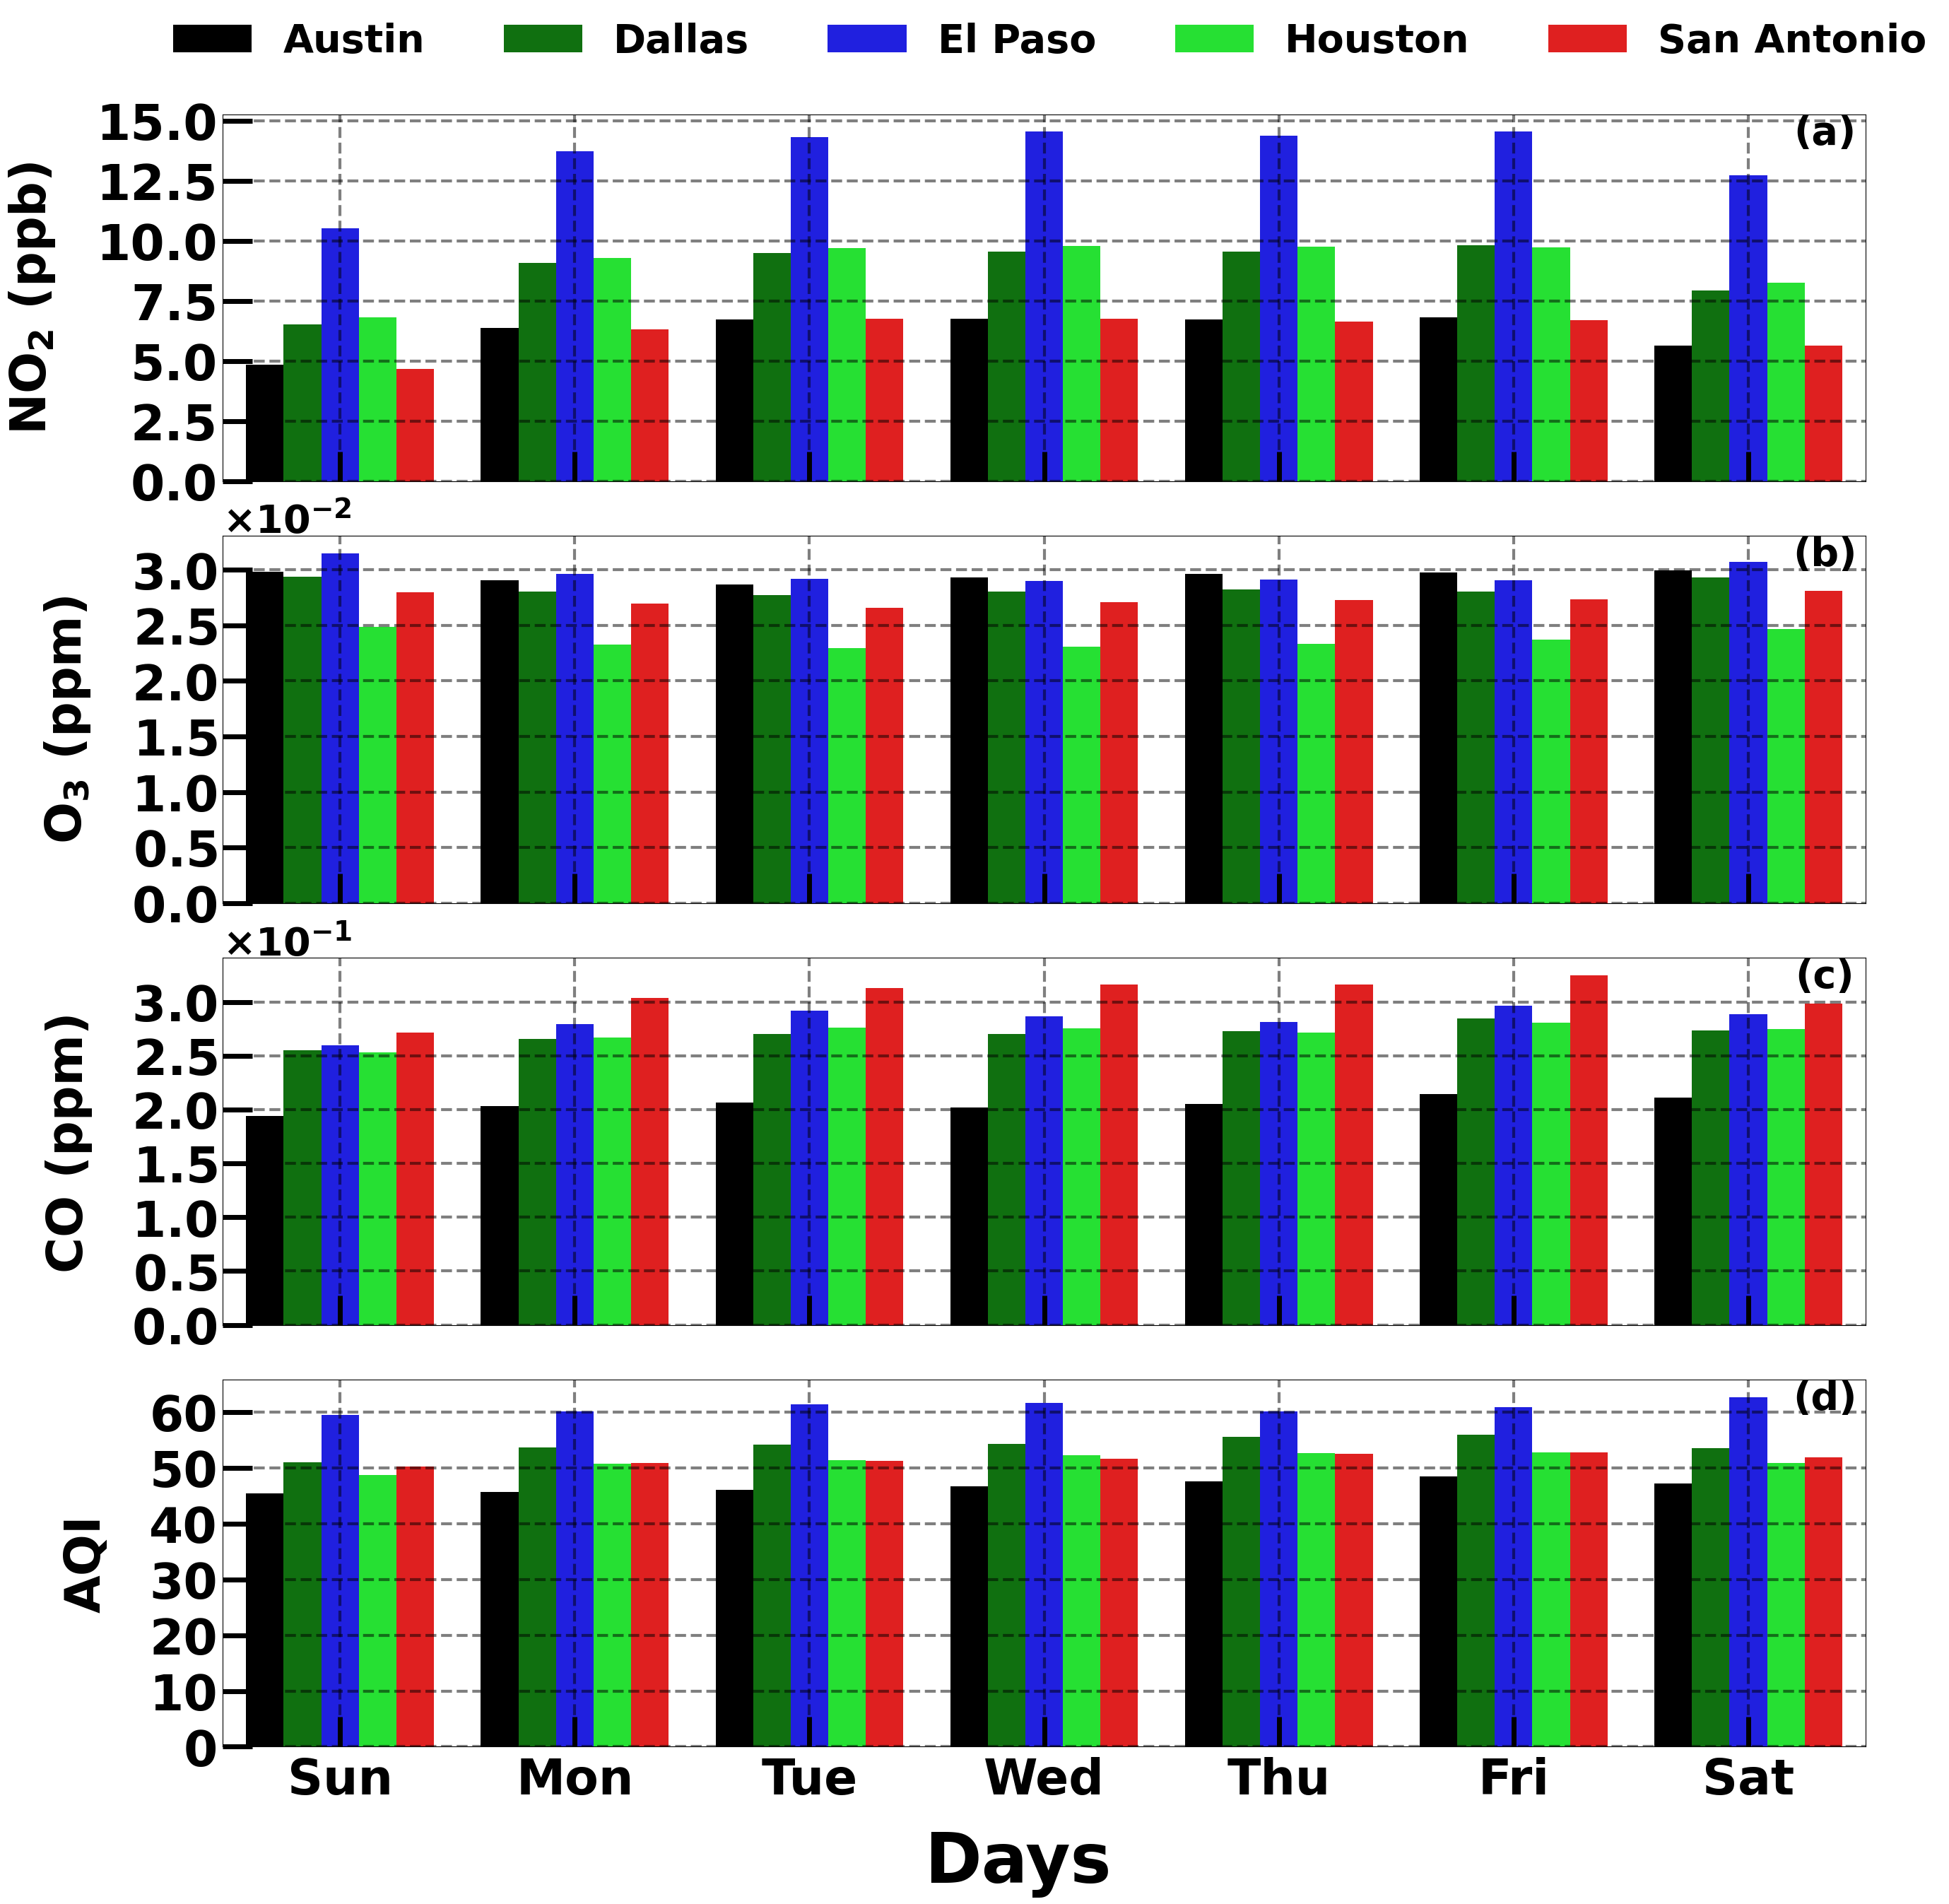

In [130]:
%%time

fig, axes = plt.subplots(4, 1, figsize=(30, 30))
image = 1

for idx, current_pollutant in enumerate(['NO2', 'O3', 'CO', 'AQI']):
    print("CURRENT POLLUTANT: ", current_pollutant)
    ax1 = plt.subplot(4,1,idx+1) 
    pollutant_df = averaged[averaged.Pollutant == current_pollutant].copy()
    # print("AVAILABLE POLLUTANTS: ", pollutant_df['Parameter Name'].unique())
    print("AVAILABLE POLLUTANTS: ", pollutant_df['Pollutant'].unique())

    
    ax = sns.barplot(x = 'Day1', y = 'mean', hue = 'City', data = pollutant_df, ax = ax1,
                palette = palette)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
    # y_coords = [p.get_height() for p in ax.patches]
    # ax.errorbar(x=x_coords, y=y_coords, yerr=pollutant_df["std"], fmt="none", c= "k")
    
    # if (idx+1) == 1:
    #     ax1.set_ylim([0, 25])
    
    ax1.set_ylabel(ylabels_local[idx], fontsize = 50, labelpad = 40, fontweight = 'bold')
    ax1.tick_params(which='both', width=5)
    ax1.tick_params(which='major', length=30)
    ax1.tick_params(which='minor', length=10)
    ax1.tick_params(which = 'both', direction = 'in')
    ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 3, color = 'black')
    ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
     
    if current_pollutant in ['Lead', "O3", 'CO']:
        ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
    else:
         ax1.yaxis.set_major_locator(plt.MaxNLocator(7))

    ax1.tick_params(axis ='y', labelbottom=True, labelsize = 50, pad = 5) 
    ax1.tick_params(axis ='x', labelbottom=True, labelsize = 50, pad = 10) 

    if image == 1:
        lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        markers = ax1.get_legend().get_patches()
        leg = fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.085, 0.94), \
                         fontsize = 40, ncol = 5,markerscale=2.5, frameon=False)

        # text_color = ['green', '#07FF19', 'red', 'blue', 'black', ]
        # for i, text in enumerate(leg.get_texts()):
        #     text.set_color(text_color[i])
        #bbox_to_anchor=(0.1275, 0.875), \
        
    # ax1.legend(loc = 'best', fontsize = 25)
    ax1.get_legend().remove()
    ax1.text(0.975, 0.92, "("+fig_names[idx]+")", horizontalalignment='center',\
         transform=ax1.transAxes, fontsize = 40, fontweight="bold", rotation = 'horizontal')
    
    
    if image not in [4]:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
        
    if current_pollutant in ["O3", "CO"]:
        from matplotlib import ticker
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_scientific(True) 
        formatter.set_powerlimits((-1,0)) 
        ax1.yaxis.set_major_formatter(formatter)
        ax1.ticklabel_format(style='scientific', axis = 'y') 
        t = ax1.yaxis.get_offset_text()
        t.set_size(40) 
    

    plt.xticks(ax1.get_xticks(), list(days_and_numbers.keys()), fontsize =50)    
    print("\n")
    image += 1
    # break
    
# fig.delaxes(axes[3][1])    
### SUBPLOT SETTINGS -----------------------------
plt.subplots_adjust(wspace=0.2, hspace=0.15)
fig.text(0.5, 0.055, 'Days', ha='center', va='center', fontsize = 70)
# plt.savefig('Weekly_TimeseriesVariation.jpg',  bbox_inches='tight', dpi = 500)

## Testing Weekly Variation

In [349]:
available_pollutants

array(['NO2', 'O3', 'CO', 'Lead', 'PM25', 'SO2', 'AQI'], dtype=object)

In [258]:
%%time



POLLUTANT:  ['Sulfur dioxide']
CPU times: total: 953 ms
Wall time: 1.02 s


POLLUTANT:  ['Carbon monoxide']
['Carbon monoxide']
['Parts per million']
CPU times: total: 1.16 s
Wall time: 1.42 s


Text(0.5, 1.0, 'CO')

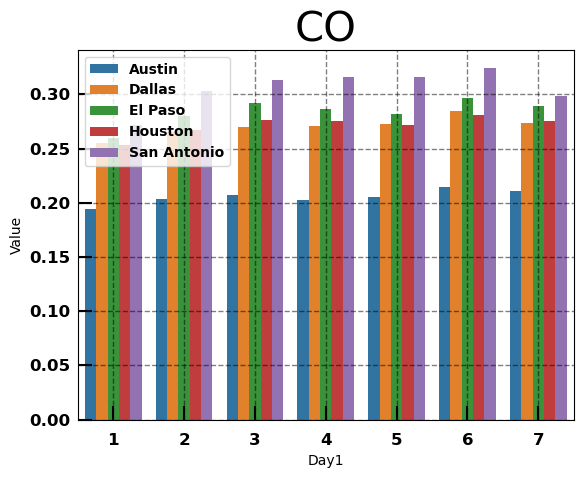

In [448]:
%%time

pol = 'CO'
a = df[df.Pollutant == pol]
print("POLLUTANT: ", a['Parameter Name'].unique())
print(a['Parameter Name'].unique())
print(a['Units of Measure'].unique())
b = a.groupby(['City', 'Day1'])['Value'].mean().reset_index()

ax1 = plt.subplot()
p = sns.barplot(x = 'Day1', y = 'Value', hue = 'City', data = b, ax = ax1)
ax1.legend(loc = 'best')
ax1.yaxis.set_major_locator(plt.MaxNLocator(7))
ax1.tick_params(axis ='y', labelbottom=True, labelsize = 12, pad = 5) 
ax1.tick_params(axis ='x', labelbottom=True, labelsize = 12, pad = 10) 
ax1.tick_params(which='both', width=1.5)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=6)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
ax1.set_title(pol, fontsize = 30)